#### https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
FAO = pd.read_pickle("FAO_clean_data.pkl")
HRCIOM= pd.read_pickle("HRCIOM_clean_data.pkl")
IFRC = pd.read_pickle("IFRC_clean_data.pkl")
UNDP = pd.read_pickle("UNDP_clean_data.pkl")
UNICEF = pd.read_pickle("UNICEF_clean_data.pkl")
WFP = pd.read_pickle("WFP_clean_data.pkl")
WHO = pd.read_pickle("WHO_clean_data.pkl")

In [3]:
frames = [FAO, HRCIOM, IFRC, UNDP,UNICEF, WFP, WHO ]
df = pd.concat(frames)

In [4]:
df

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,FAO,FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...,"[FOOD, SECURITY, AND, NUTRITION, IN, THE, WORLD, THE, STATE, OF, SAFEGUARDING, AGAINST, ECONOMIC...",FOOD SECURITY AND NUTRITION IN THE WORLD THE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOWNS AN...,en,"[FOOD, SECURITY, AND, NUTRITION, IN, THE, WORLD, THE, STATE, OF, SAFEGUARDING, AGAINST, ECONOMIC...","[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, and, nutrition, in, the, world, the, state, of, safeguarding, against, economic...","[food, security, nutrition, world, state, safeguarding, economic, slowdowns, downturnsdemocratic...","[(food, NN), (security, NN), (nutrition, NN), (world, NN), (state, NN), (safeguarding, VBG), (ec...","[(food, n), (security, n), (nutrition, n), (world, n), (state, n), (safeguarding, v), (economic,...","[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re..."
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, 20192019, review, trends, glance, end, 2019, result, persec...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (20192019, CD), (review, NN), (trends, N...","[(global, a), (trendsforced, v), (displacement, a), (20192019, n), (review, n), (trends, n), (gl...","[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu..."
0,IFRC,Leaving Millions \nBehindWorld Disasters Report\n 2018The international humanitarian sector \n m...,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...",Leaving Millions BehindWorld Disasters Report 2018The international humanitarian sector must do ...,en,"[Leaving, Millions, BehindWorld, Disasters, Report, 2018The, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[leaving, millions, behindworld, disasters, report, 2018the, international, humanitarian, sector...","[(leaving, VBG), (millions, NNS), (behindworld, IN), (disasters, NNS), (report, VBP), (2018the, ...","[(leaving, v), (millions, n), (behindworld, n), (disasters, n), (report, v), (2018the, n), (inte...","[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu..."
0,UNDP,"Local, National, Global\n: \nEvaluative \nEvidence of Scaling up the SDGs\n Authors:\n Juha I....","[Local,, National,, Global, :, Evaluative, Evidence, of, Scaling, up, the, SDGs, Authors:, Juha,...","Local, National, Global : Evaluative Evidence of Scaling up the SDGs Authors: Juha I. Uitto, Dir...",en,"[Local, ,, National, ,, Global, :, Evaluative, Evidence, of, Scaling, up, the, SDGs, Authors, :,...","[local, ,, national, ,, global, :, evaluative, evidence, of, scaling, up, the, sdgs, authors, :,...","[local, national, global, evaluative, evidence, of, scaling, up, the, sdgs, authors, juha, i., u...","[local, national, global, evaluative, evidence, scaling, sdgs, authors, juha, i., uitto, directo...","[(local, JJ), (national, JJ), (global, JJ), (evaluative, JJ), 

In [5]:
df = df[['cluster', 'lemmatized']]
df.head()

,cluster,lemmatized
0,FAO,"[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re..."
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu..."
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu..."
0,UNDP,"[local, national, global, evaluative, evidence, scale, sdgs, author, juha, i., uitto, director, ..."
0,UNICEF,"[www.thelancet.com/lancetgh, vol, 7, july, 2019, e849national, regional, worldwide, estimate, lo..."


## Sentiment Analysis

In [6]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,cluster,lemmatized,lemma_str
0,FAO,"[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re...",food security nutrition world state safeguard economic slowdown downturnsdemocratic republic con...
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu...",leave million behindworld disaster report 2018the international humanitarian sector must respond...
0,UNDP,"[local, national, global, evaluative, evidence, scale, sdgs, author, juha, i., uitto, director, ...",local national global evaluative evidence scale sdgs author juha i. uitto director independent e...
0,UNICEF,"[www.thelancet.com/lancetgh, vol, 7, july, 2019, e849national, regional, worldwide, estimate, lo...",www.thelancet.com/lancetgh vol 7 july 2019 e849national regional worldwide estimate low birthwei...


In [7]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,cluster,lemmatized,lemma_str,sentiment
0,FAO,"[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re...",food security nutrition world state safeguard economic slowdown downturnsdemocratic republic con...,0.043677
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...,0.085858
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu...",leave million behindworld disaster report 2018the international humanitarian sector must respond...,0.055057
0,UNDP,"[local, national, global, evaluative, evidence, scale, sdgs, author, juha, i., uitto, director, ...",local national global evaluative evidence scale sdgs author juha i. uitto director independent e...,0.051704
0,UNICEF,"[www.thelancet.com/lancetgh, vol, 7, july, 2019, e849national, regional, worldwide, estimate, lo...",www.thelancet.com/lancetgh vol 7 july 2019 e849national regional worldwide estimate low birthwei...,0.063822


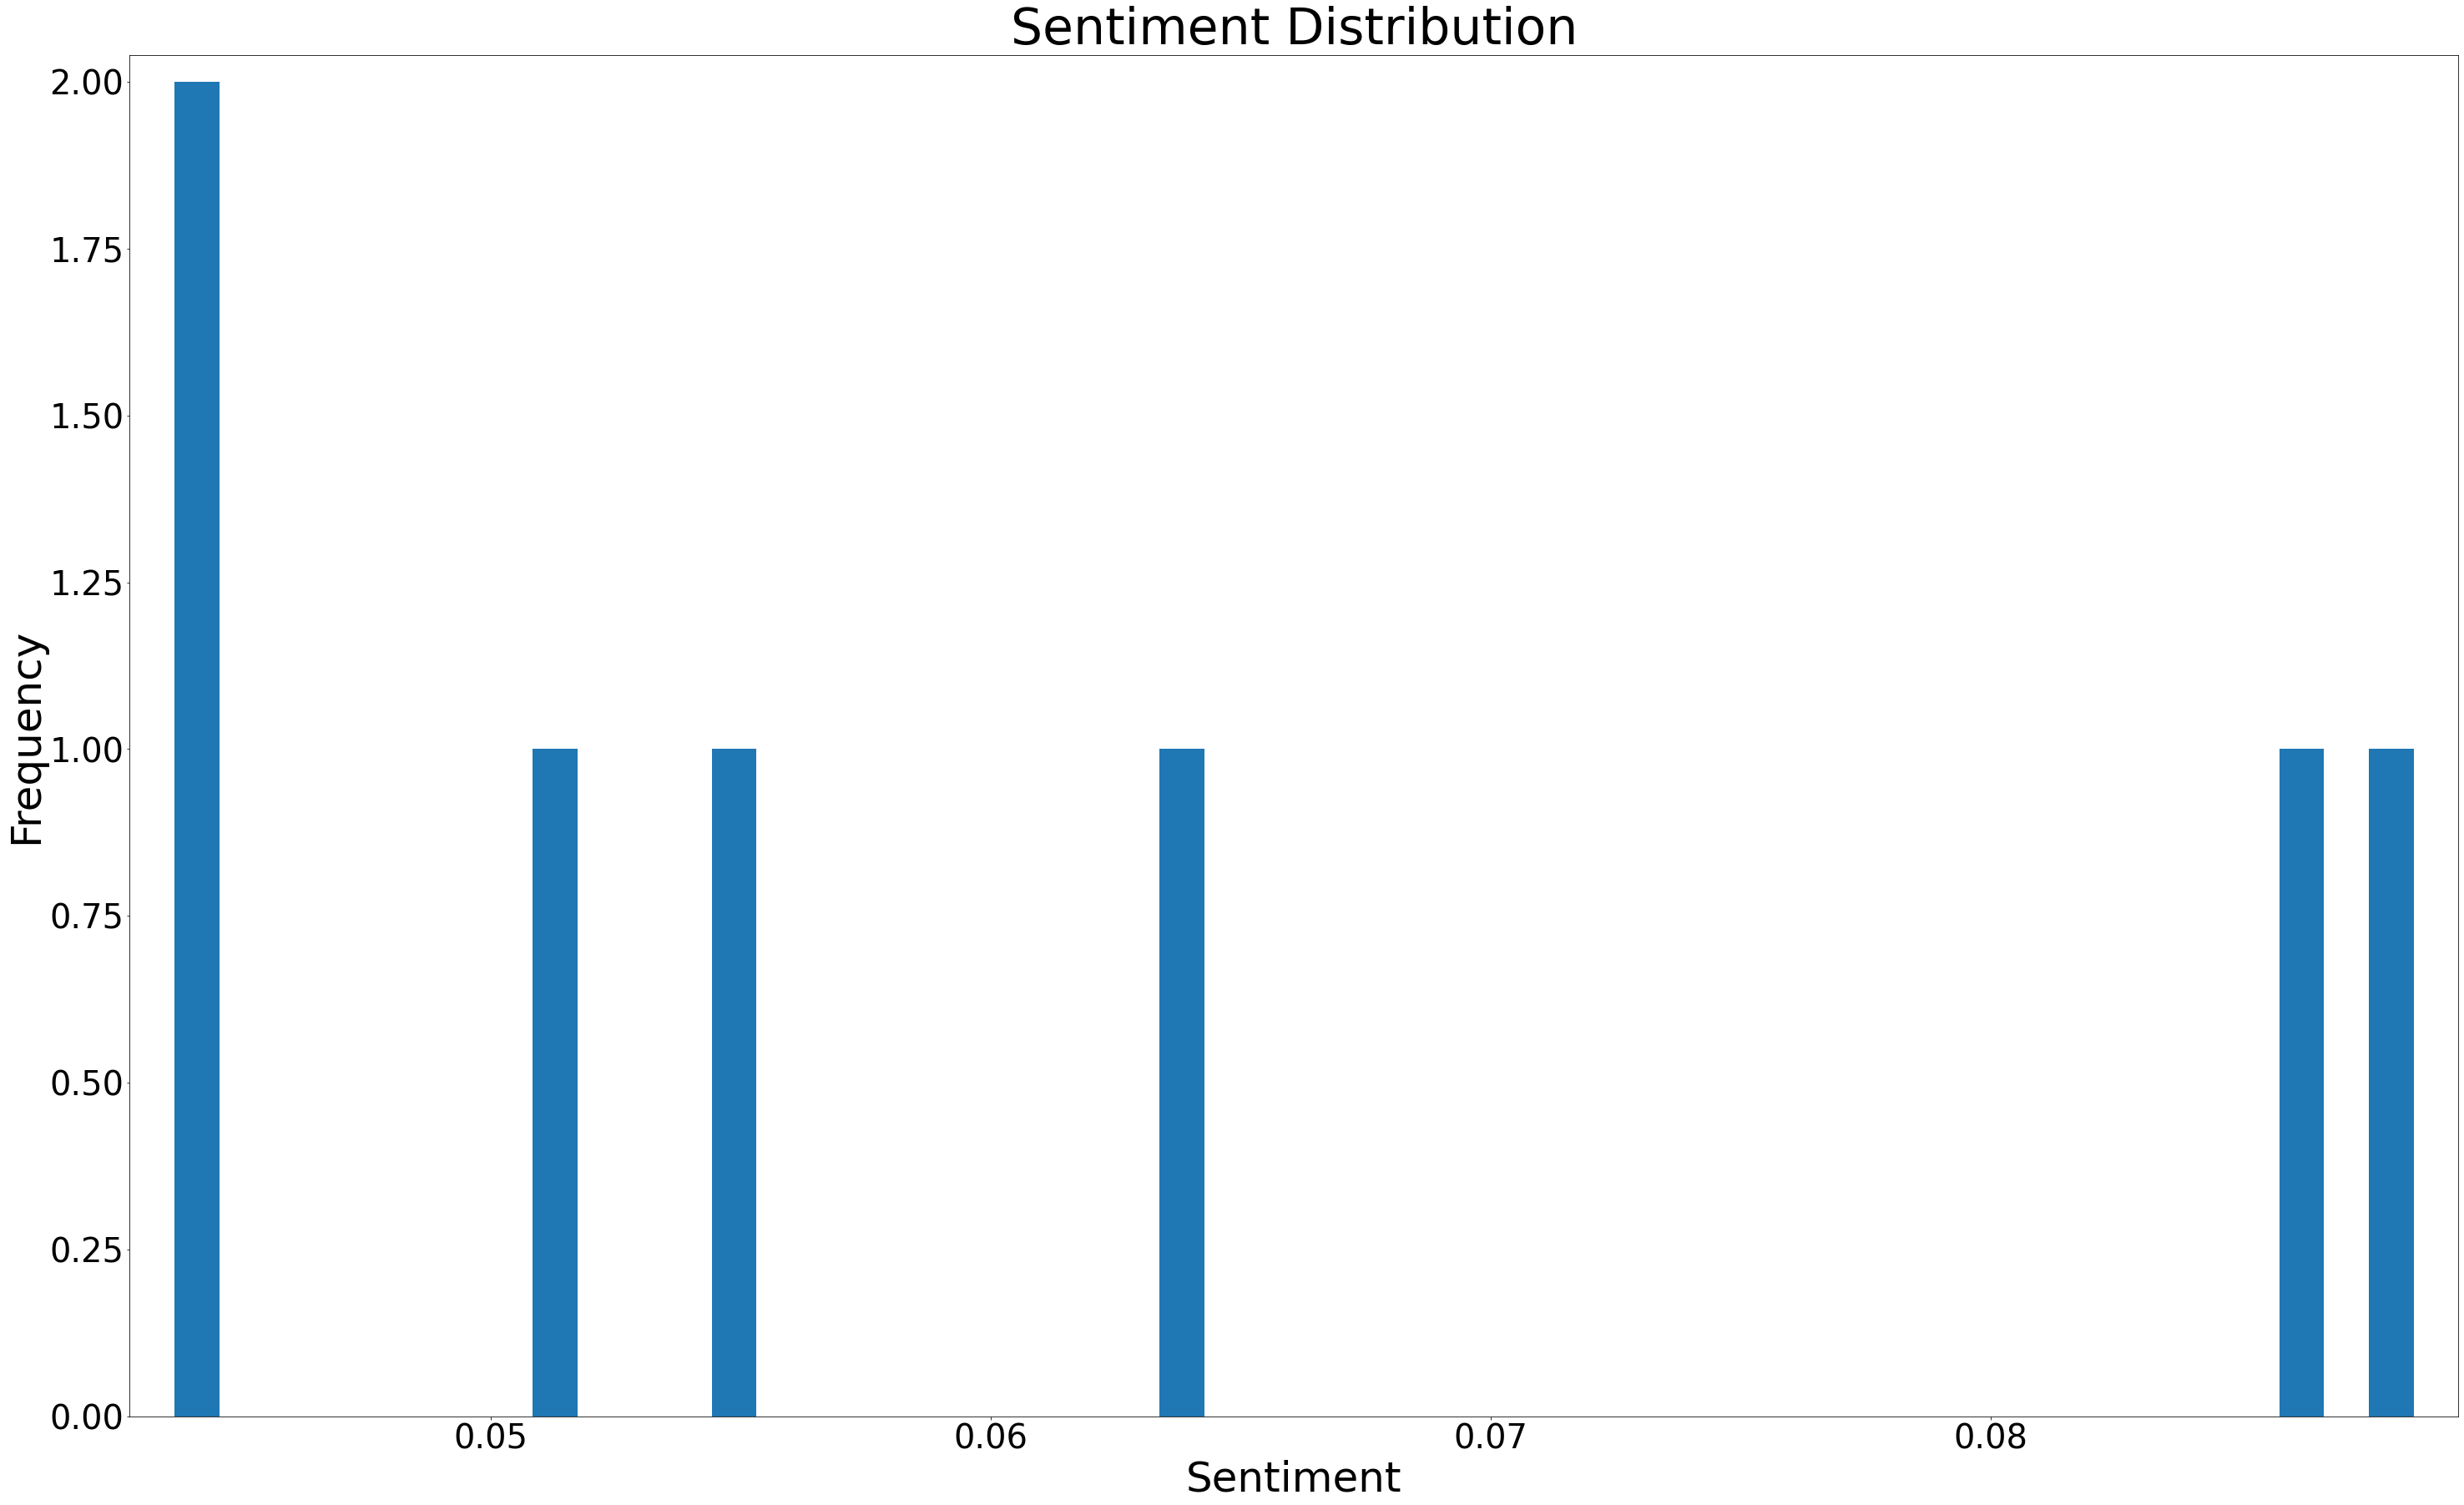

In [8]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'HCR IOM'),
  Text(1, 0, 'UNDP'),
  Text(2, 0, 'IFRC'),
  Text(3, 0, 'FAO'),
  Text(4, 0, 'WHO'),
  Text(5, 0, 'WFP'),
  Text(6, 0, 'UNICEF')])

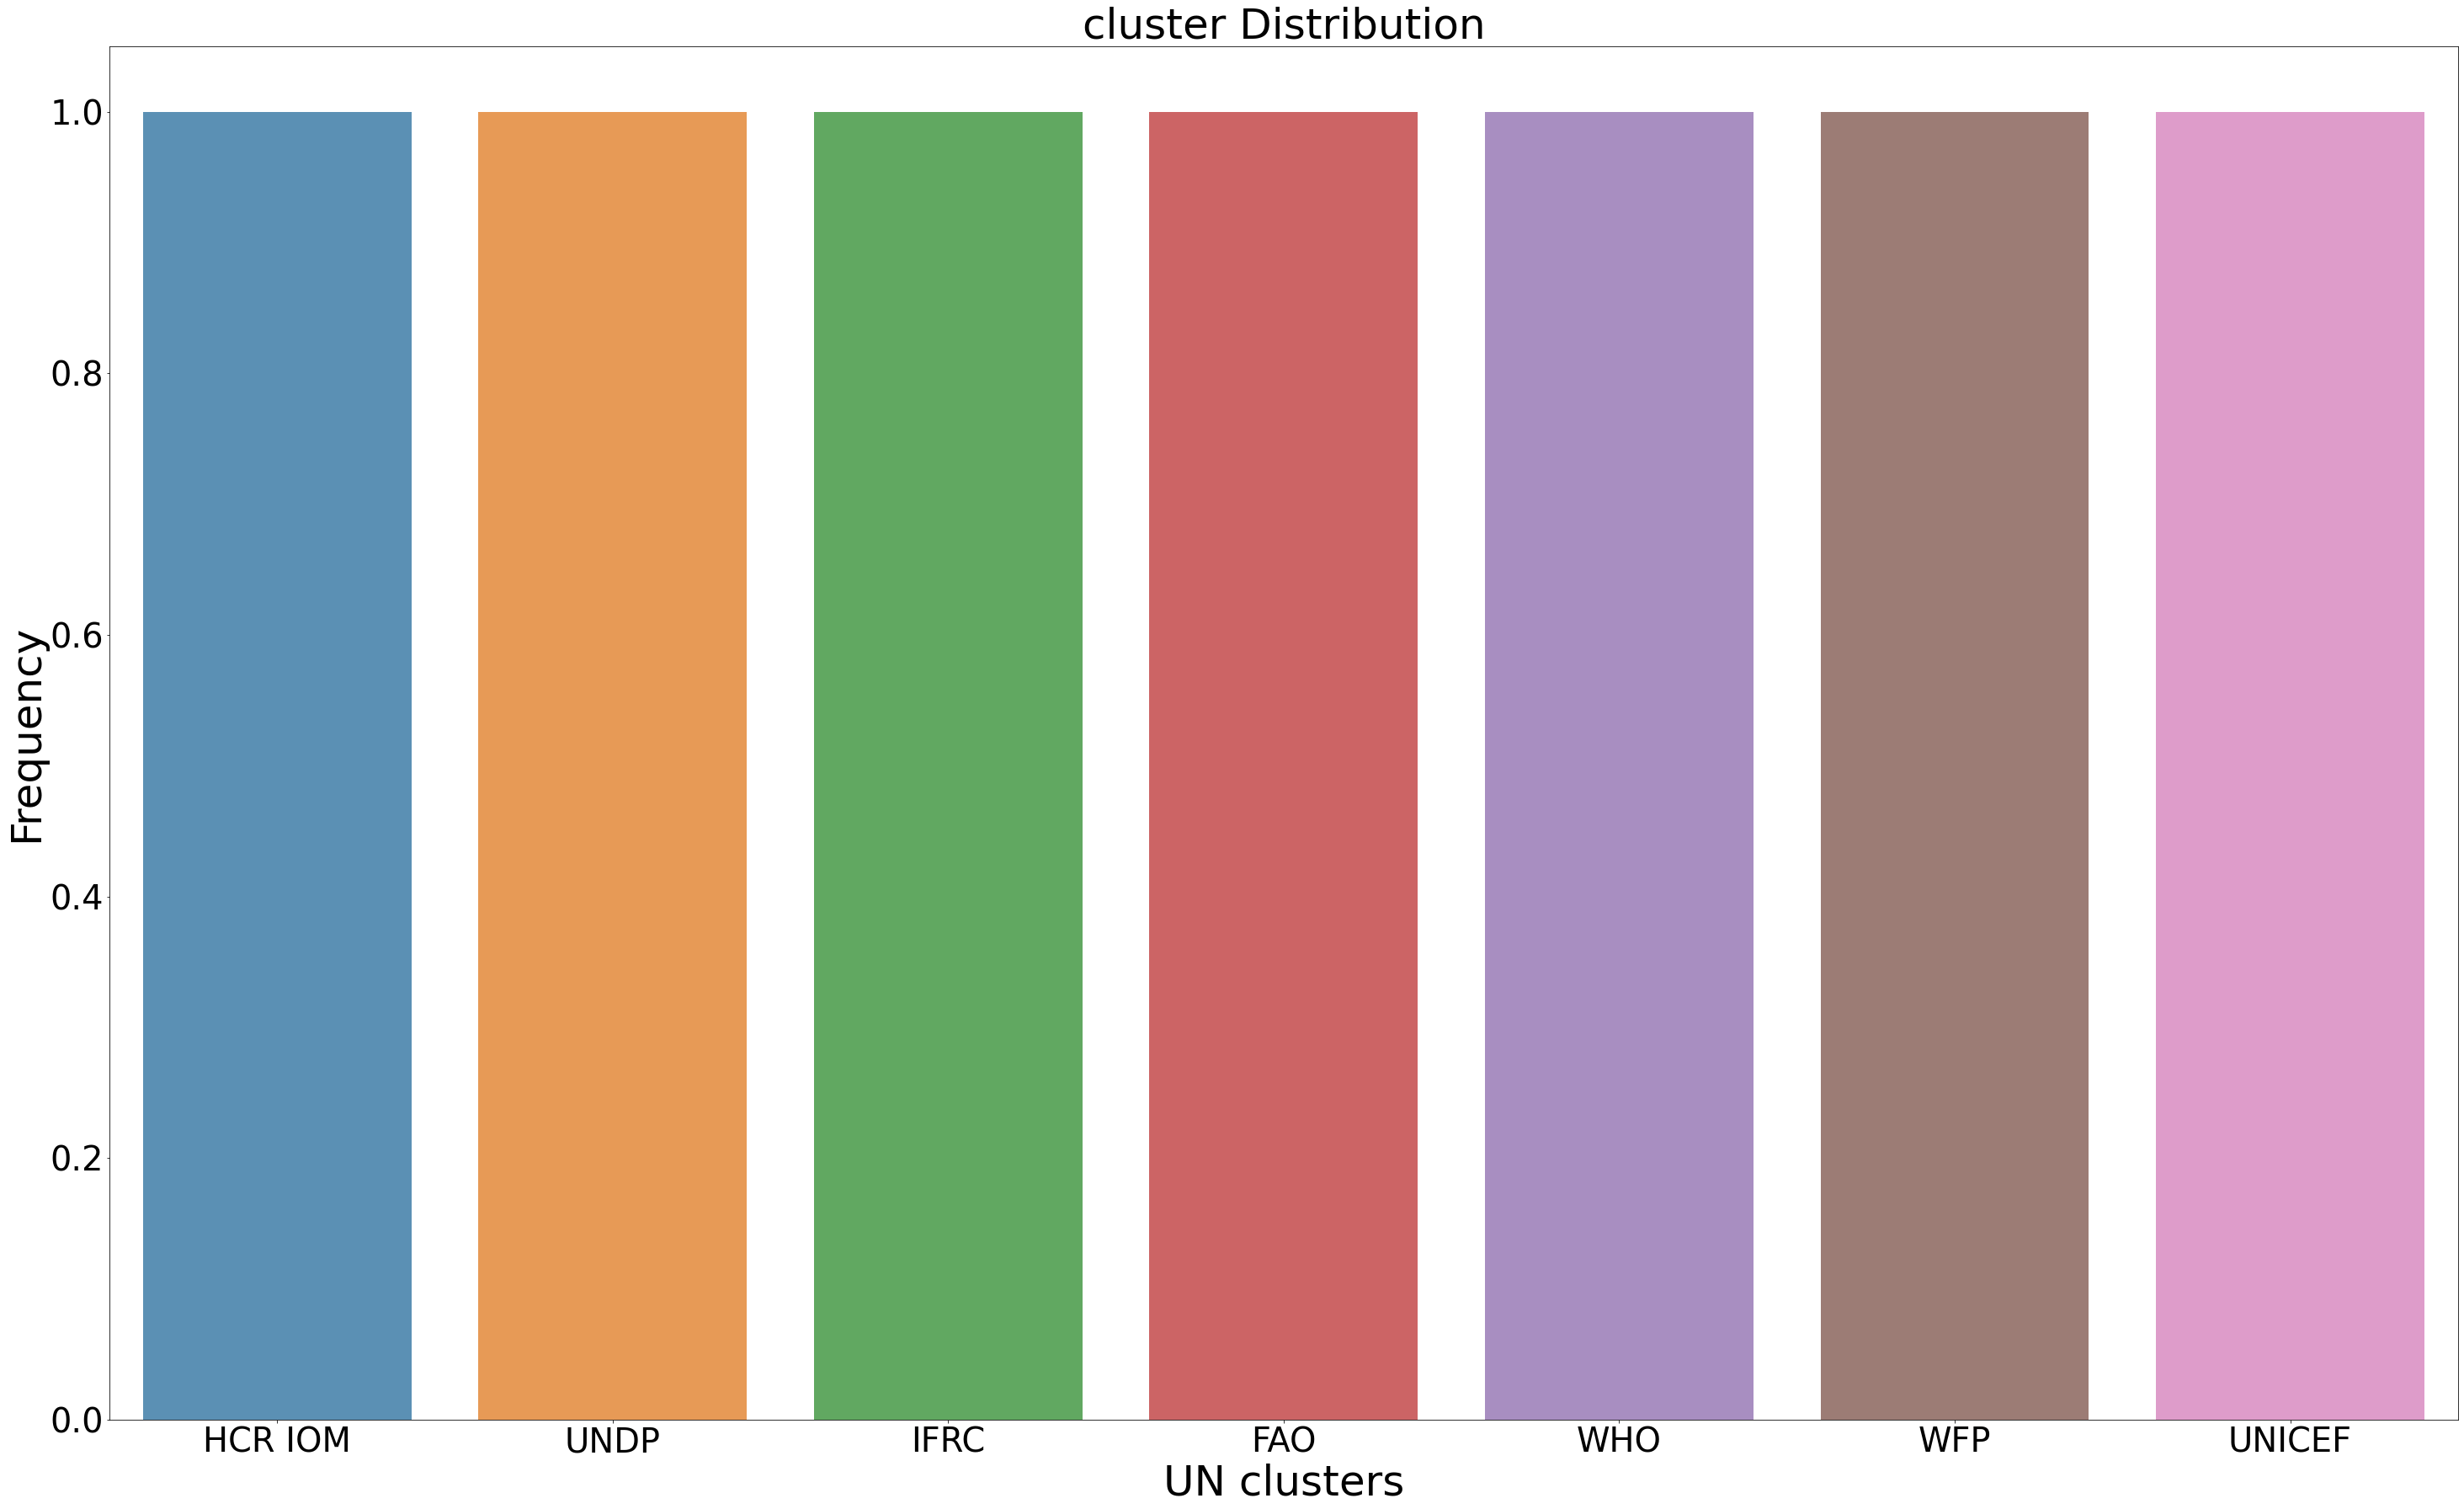

In [9]:
x_cluster = df.cluster.value_counts()
y_cluster = x_cluster.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_cluster.index, x_cluster.values, alpha=0.8)
plt.title("cluster Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('UN clusters', fontsize=50)
plt.xticks(fontsize=40)

<AxesSubplot:title={'center':'Percentage of Clusters'}, ylabel='cluster'>

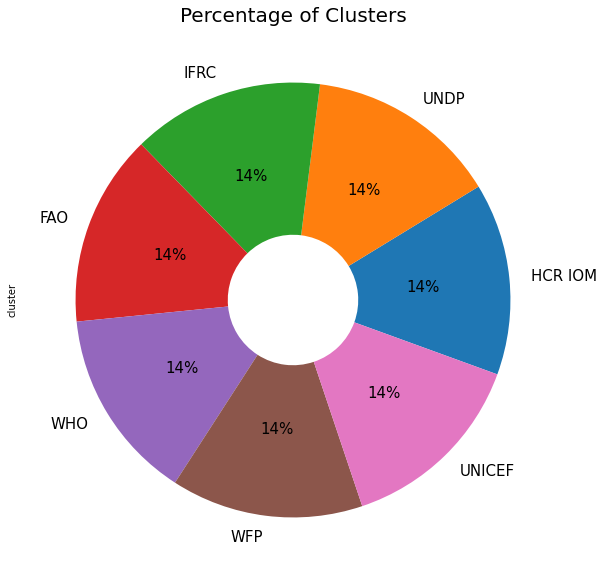

In [10]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Clusters', fontsize=20)
df.cluster.value_counts().plot(kind='pie',
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

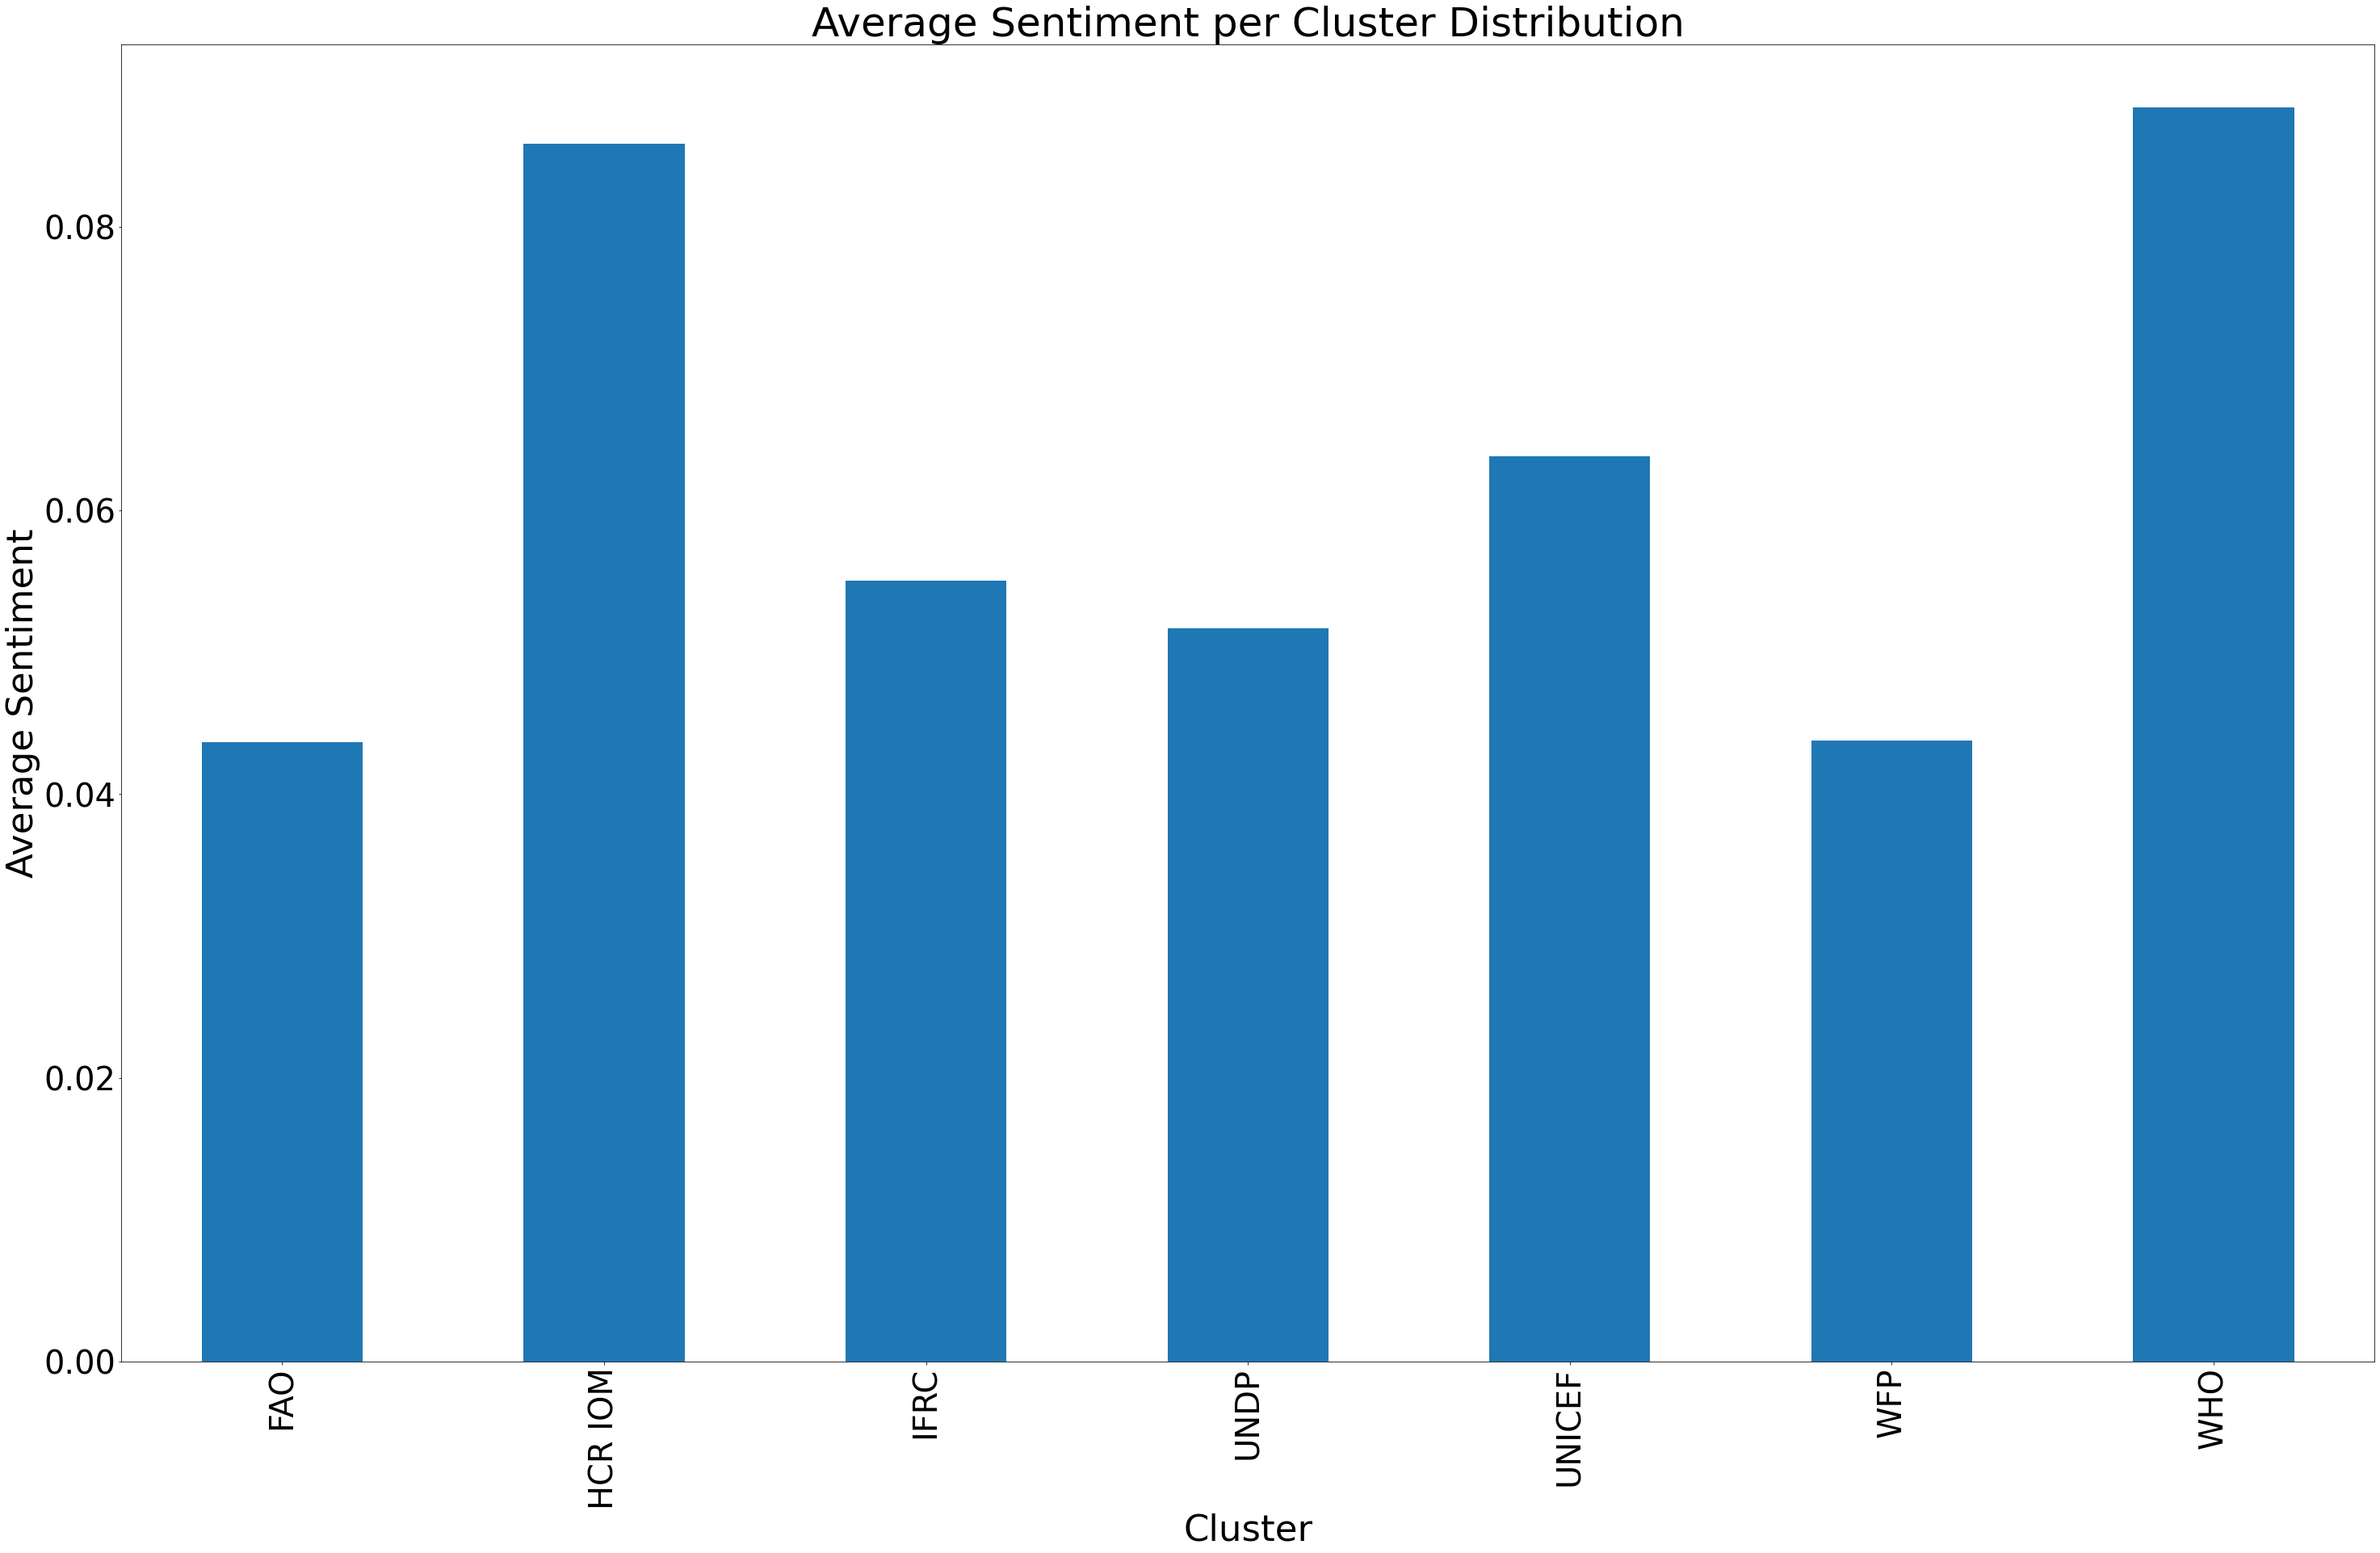

In [11]:
polarity_avg = df.groupby('cluster')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Cluster', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Cluster Distribution', fontsize=50)
plt.show()

In [12]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['word_len'] = df['lemma_str'].astype(str).apply(len)

In [13]:
df

,cluster,lemmatized,lemma_str,sentiment,word_count,word_len
0,FAO,"[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re...",food security nutrition world state safeguard economic slowdown downturnsdemocratic republic con...,0.043677,71671,601379
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...,0.085858,113100,907218
0,IFRC,"[leave, million, behindworld, disaster, report, 2018the, international, humanitarian, sector, mu...",leave million behindworld disaster report 2018the international humanitarian sector must respond...,0.055057,87331,671979
0,UNDP,"[local, national, global, evaluative, evidence, scale, sdgs, author, juha, i., uitto, director, ...",local national global evaluative evidence scale sdgs author juha i. uitto director independent e...,0.051704,181157,1480774
0,UNICEF,"[www.thelancet.com/lancetgh, vol, 7, july, 2019, e849national, regional, worldwide, estimate, lo...",www.thelancet.com/lancetgh vol 7 july 2019 e849national regional worldwide estimate low birthwei...,0.063822,86634,742523
0,WFP,"[food, security, nutrition, world, state, safeguard, economic, slowdown, downturnsdemocratic, re...",food security nutrition world state safeguard economic slowdown downturnsdemocratic republic con...,0.043797,172470,1344431
0,WHO,"[1what, world, report, vision, wsd19, world, sight, day, 3world, report, vision, launch, pack, m...",1what world report vision wsd19 world sight day 3world report vision launch pack message 34wrv w...,0.088451,112151,760018


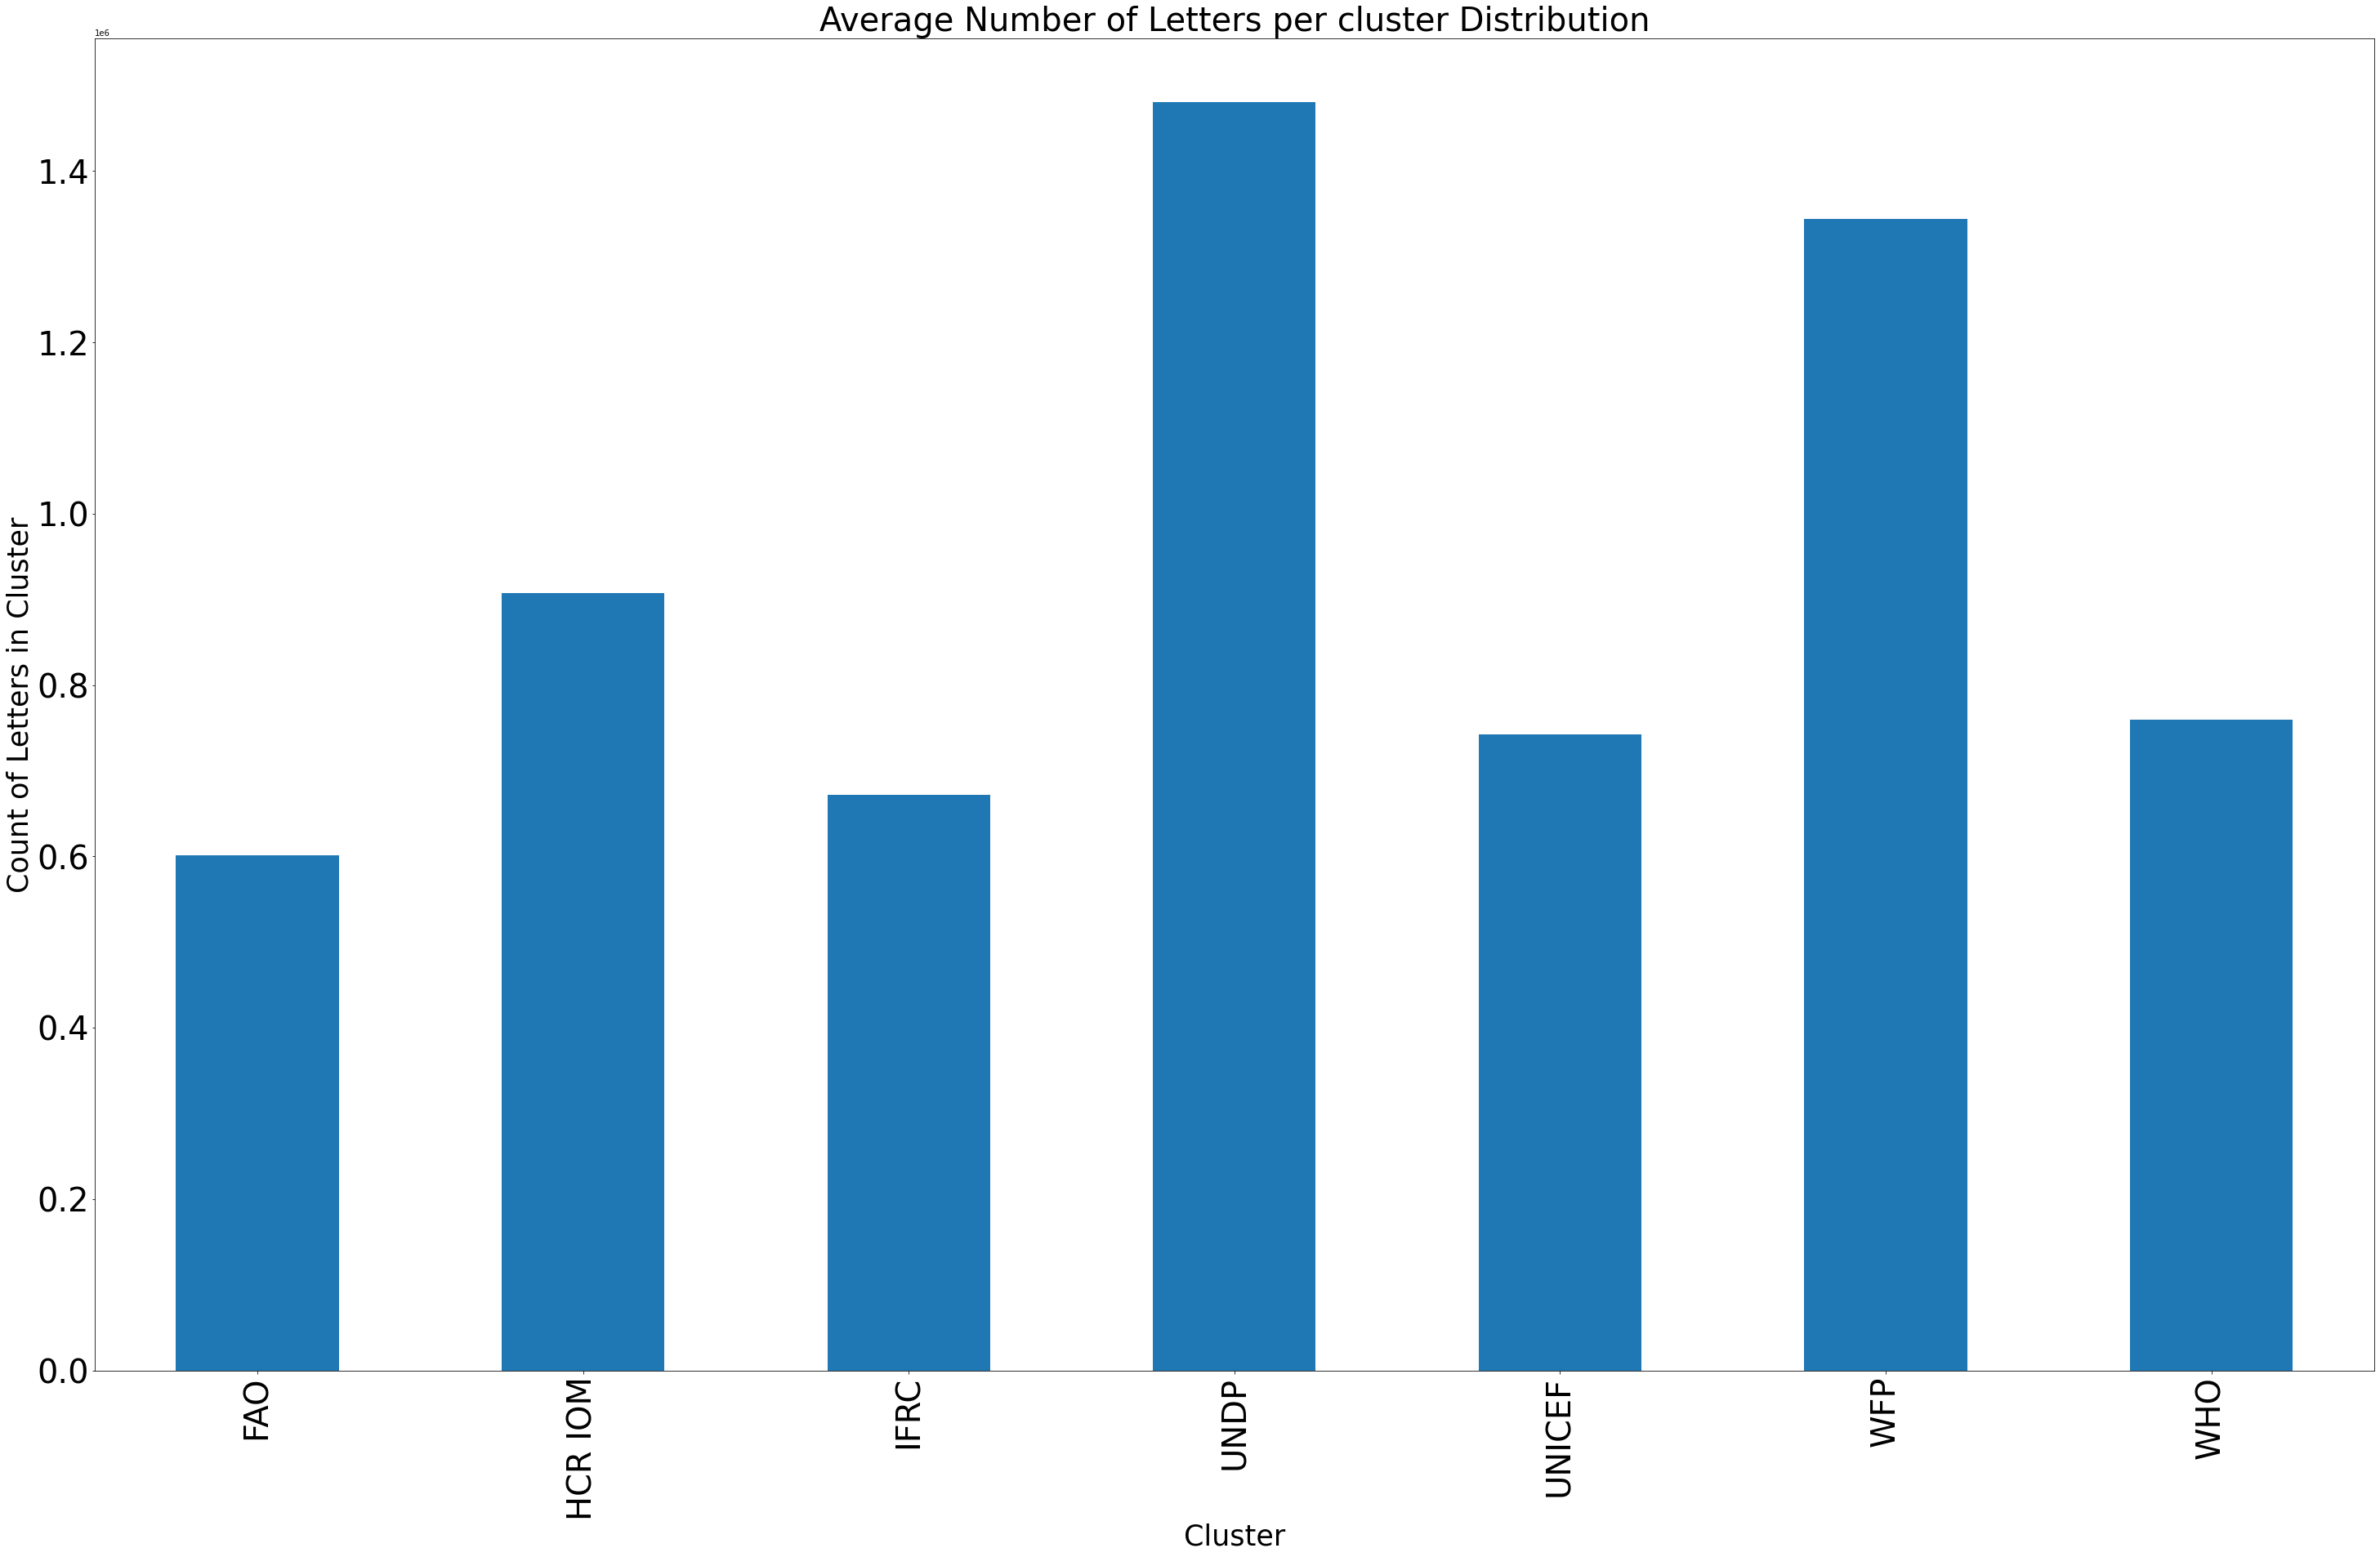

In [14]:
letter_avg = df.groupby('cluster')['word_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Cluster', fontsize=35)
plt.ylabel('Count of Letters in Cluster', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per cluster Distribution', fontsize=40)
plt.show()

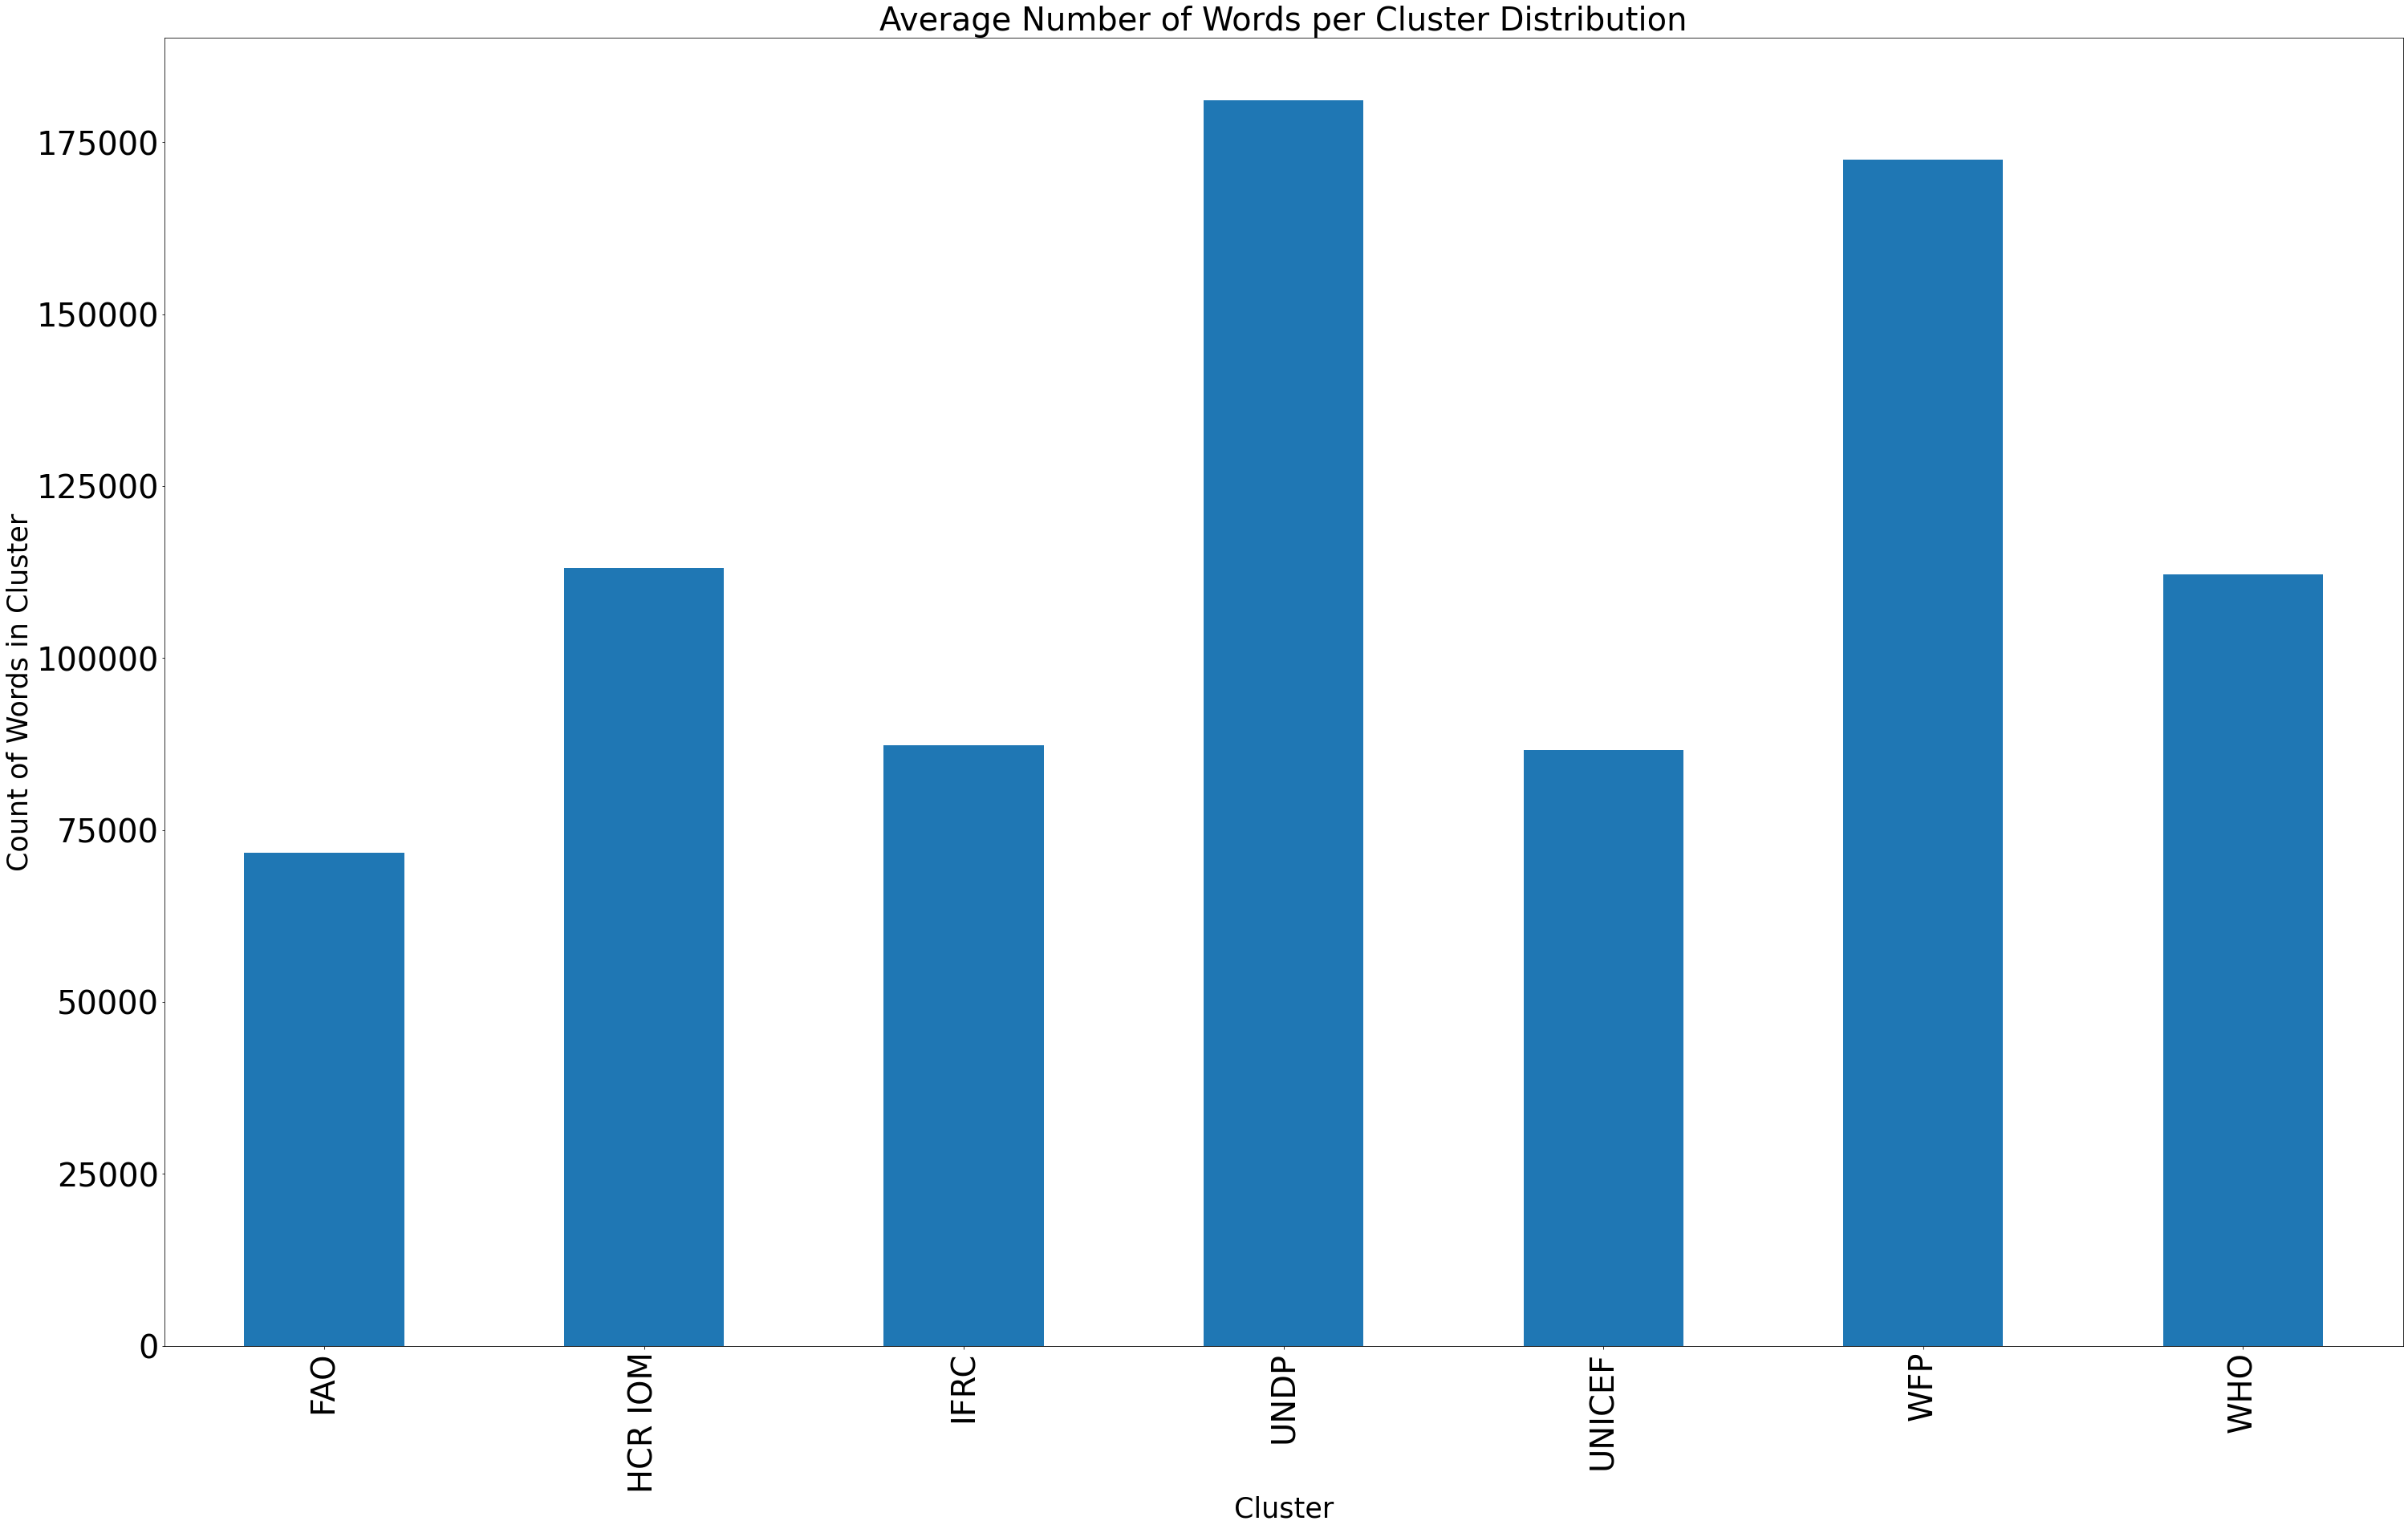

In [15]:
word_avg = df.groupby('cluster')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Cluster', fontsize=35)
plt.ylabel('Count of Words in Cluster', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Cluster Distribution', fontsize=40)
plt.show()

<AxesSubplot:>

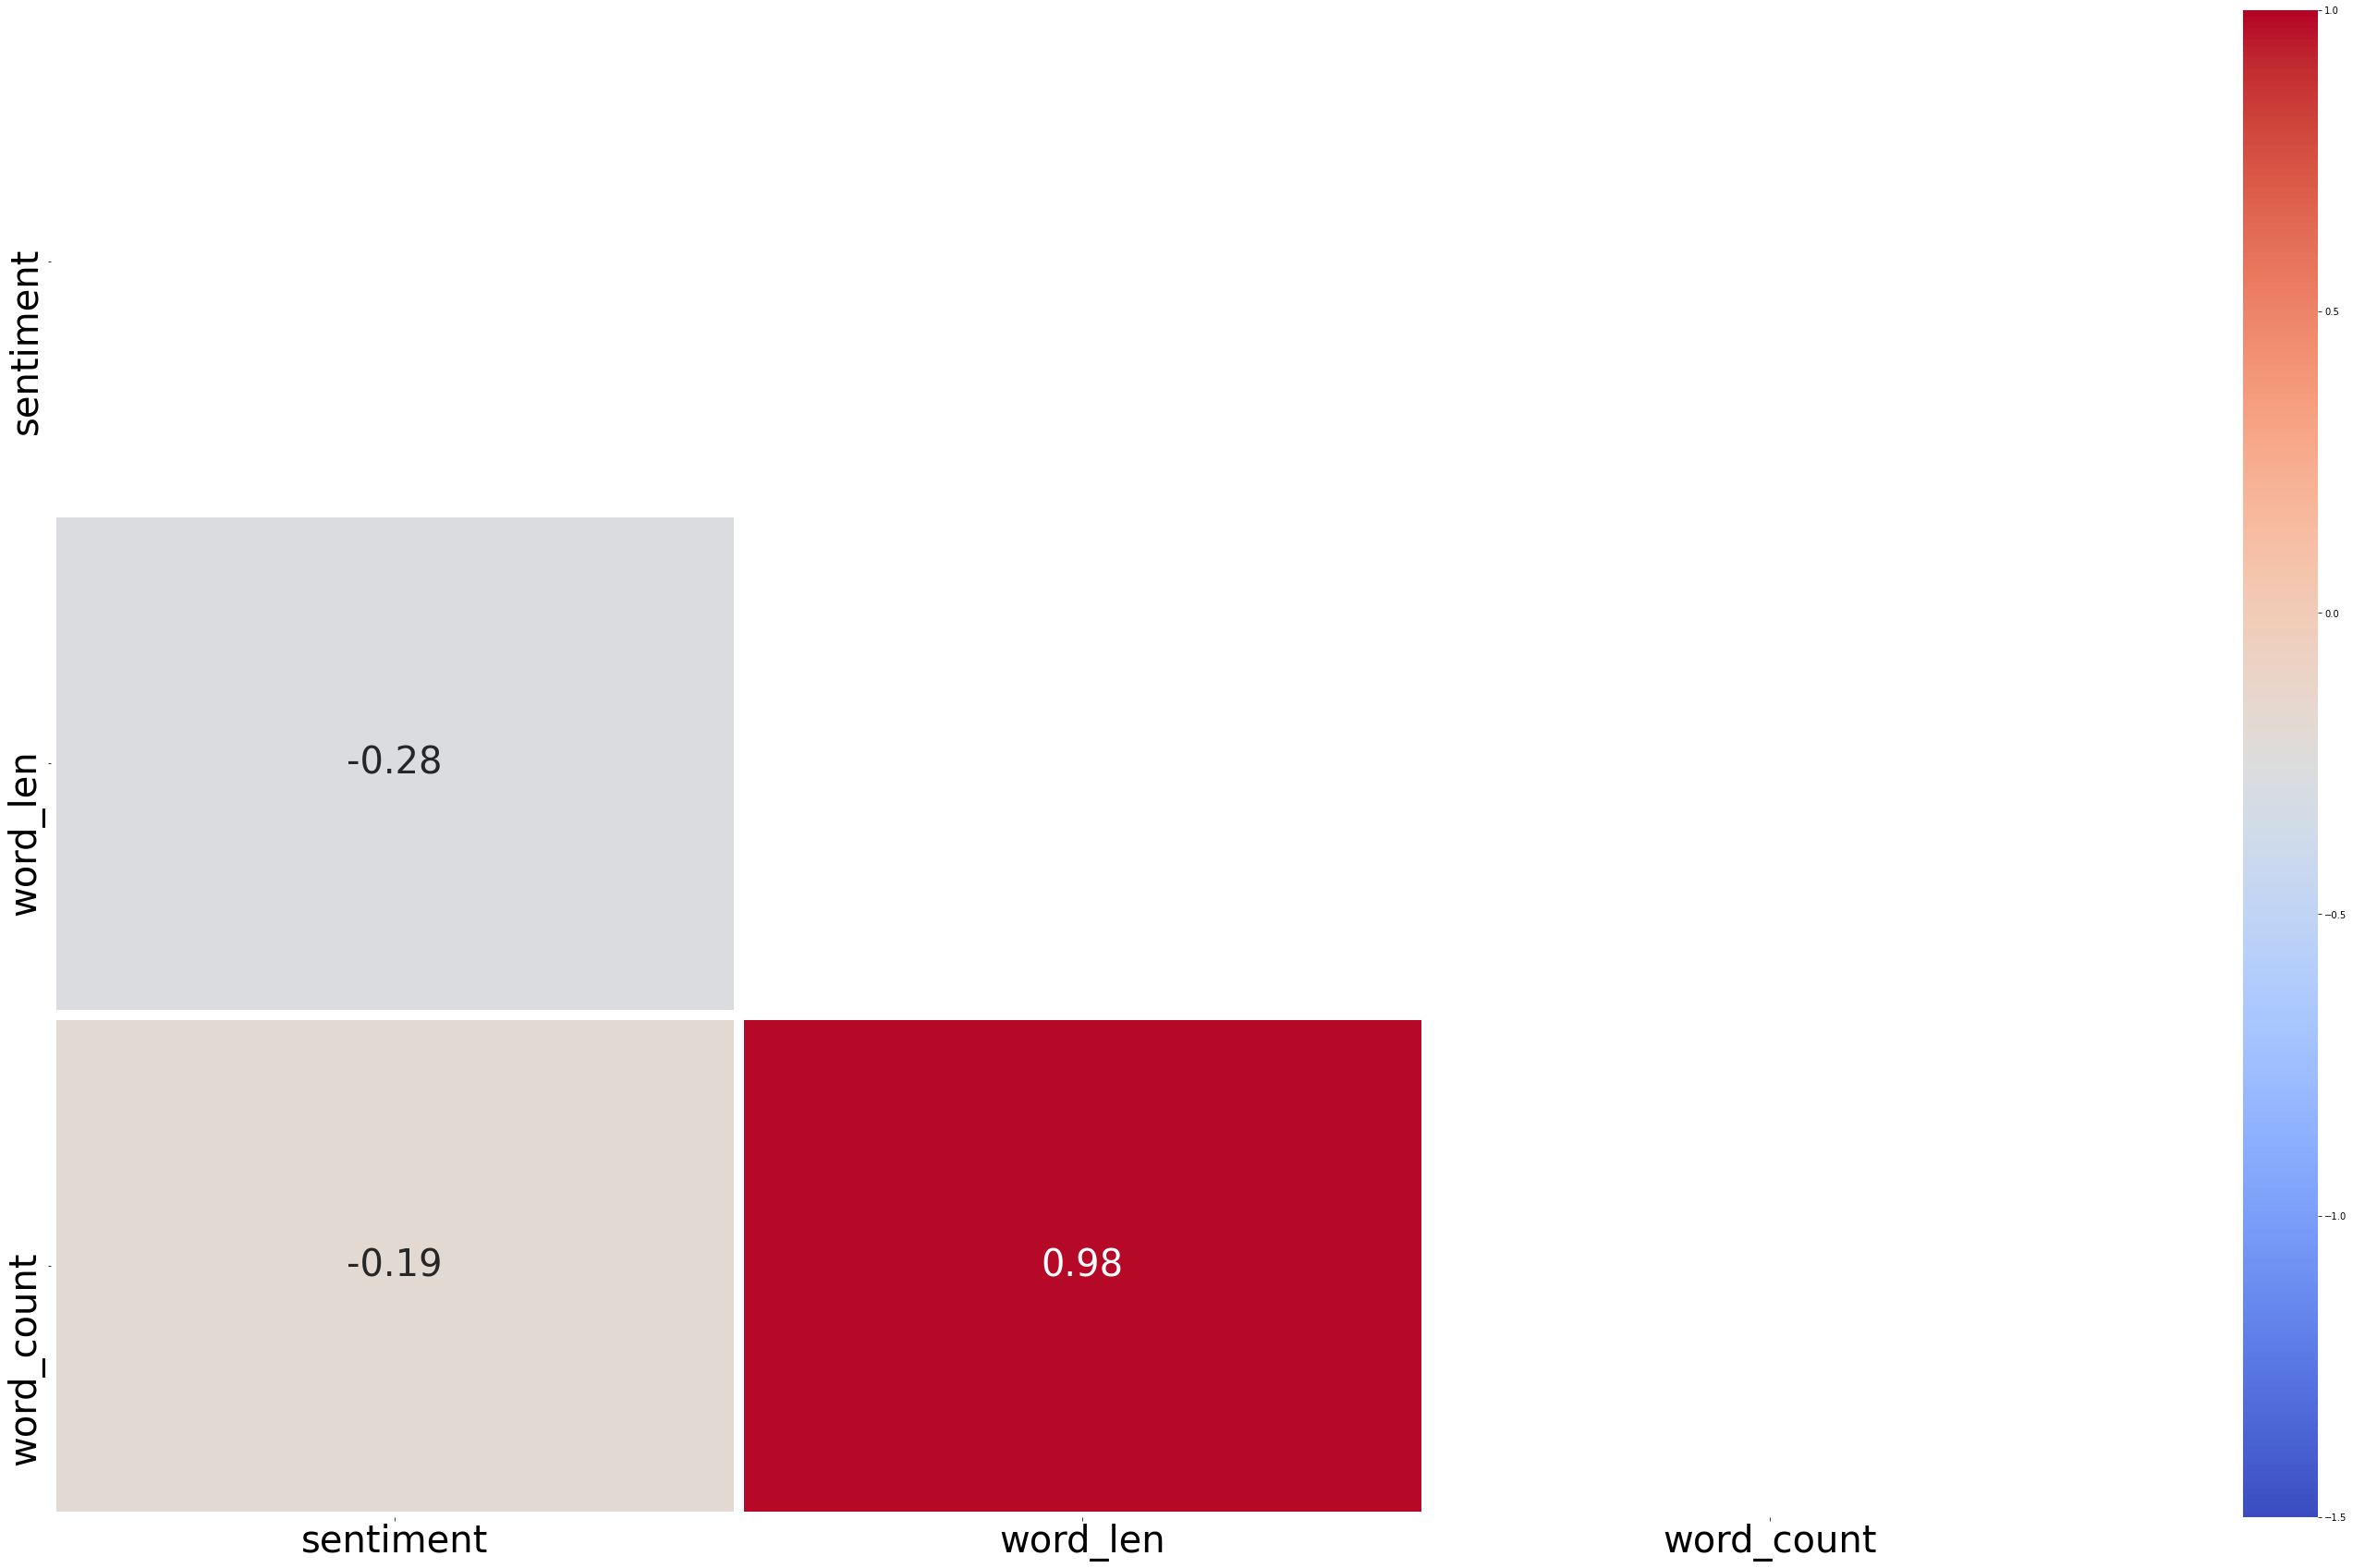

In [16]:
correlation = df[['cluster','sentiment', 'word_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)


## Term Frequency Analysis

In [17]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



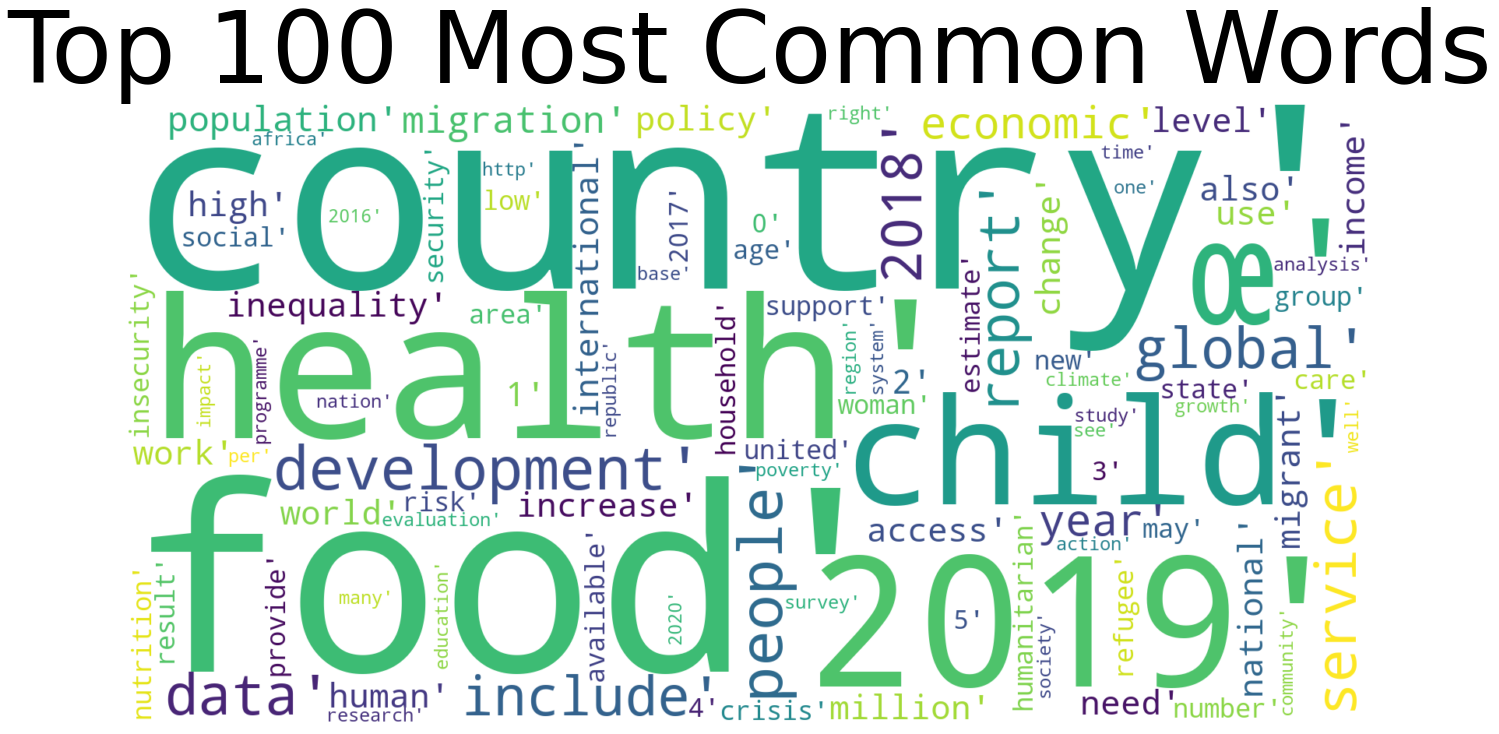

In [18]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

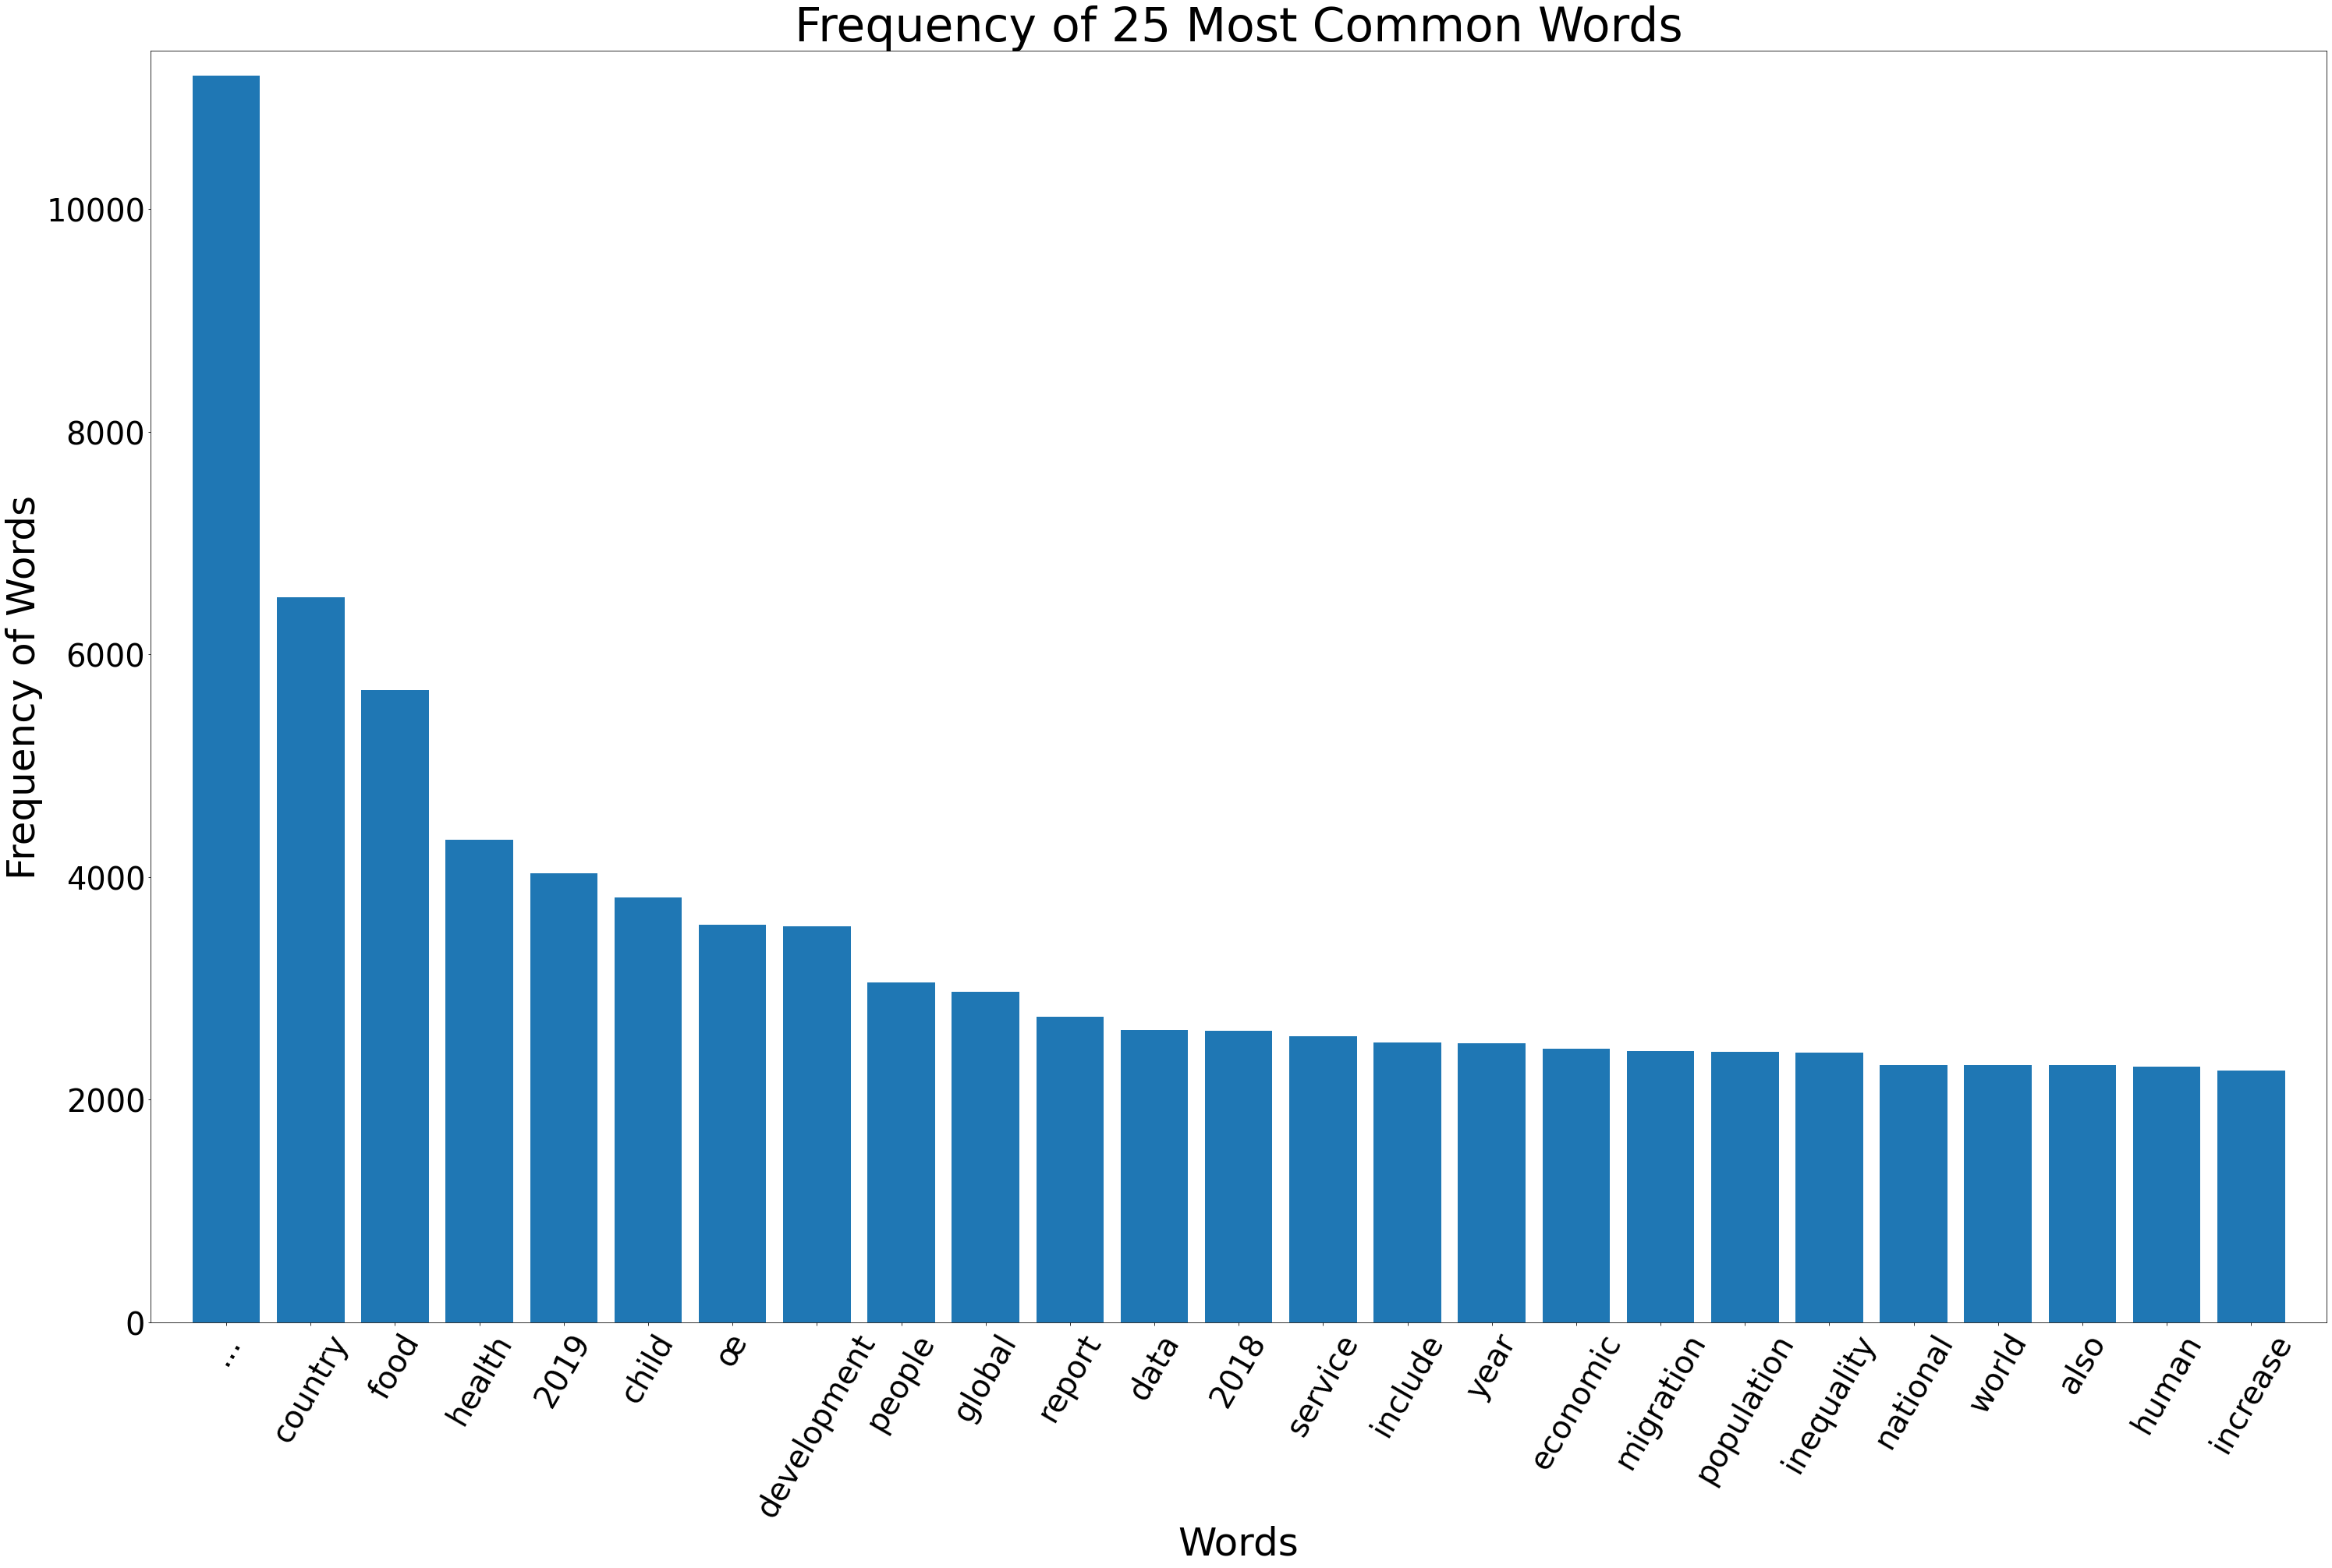

In [19]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

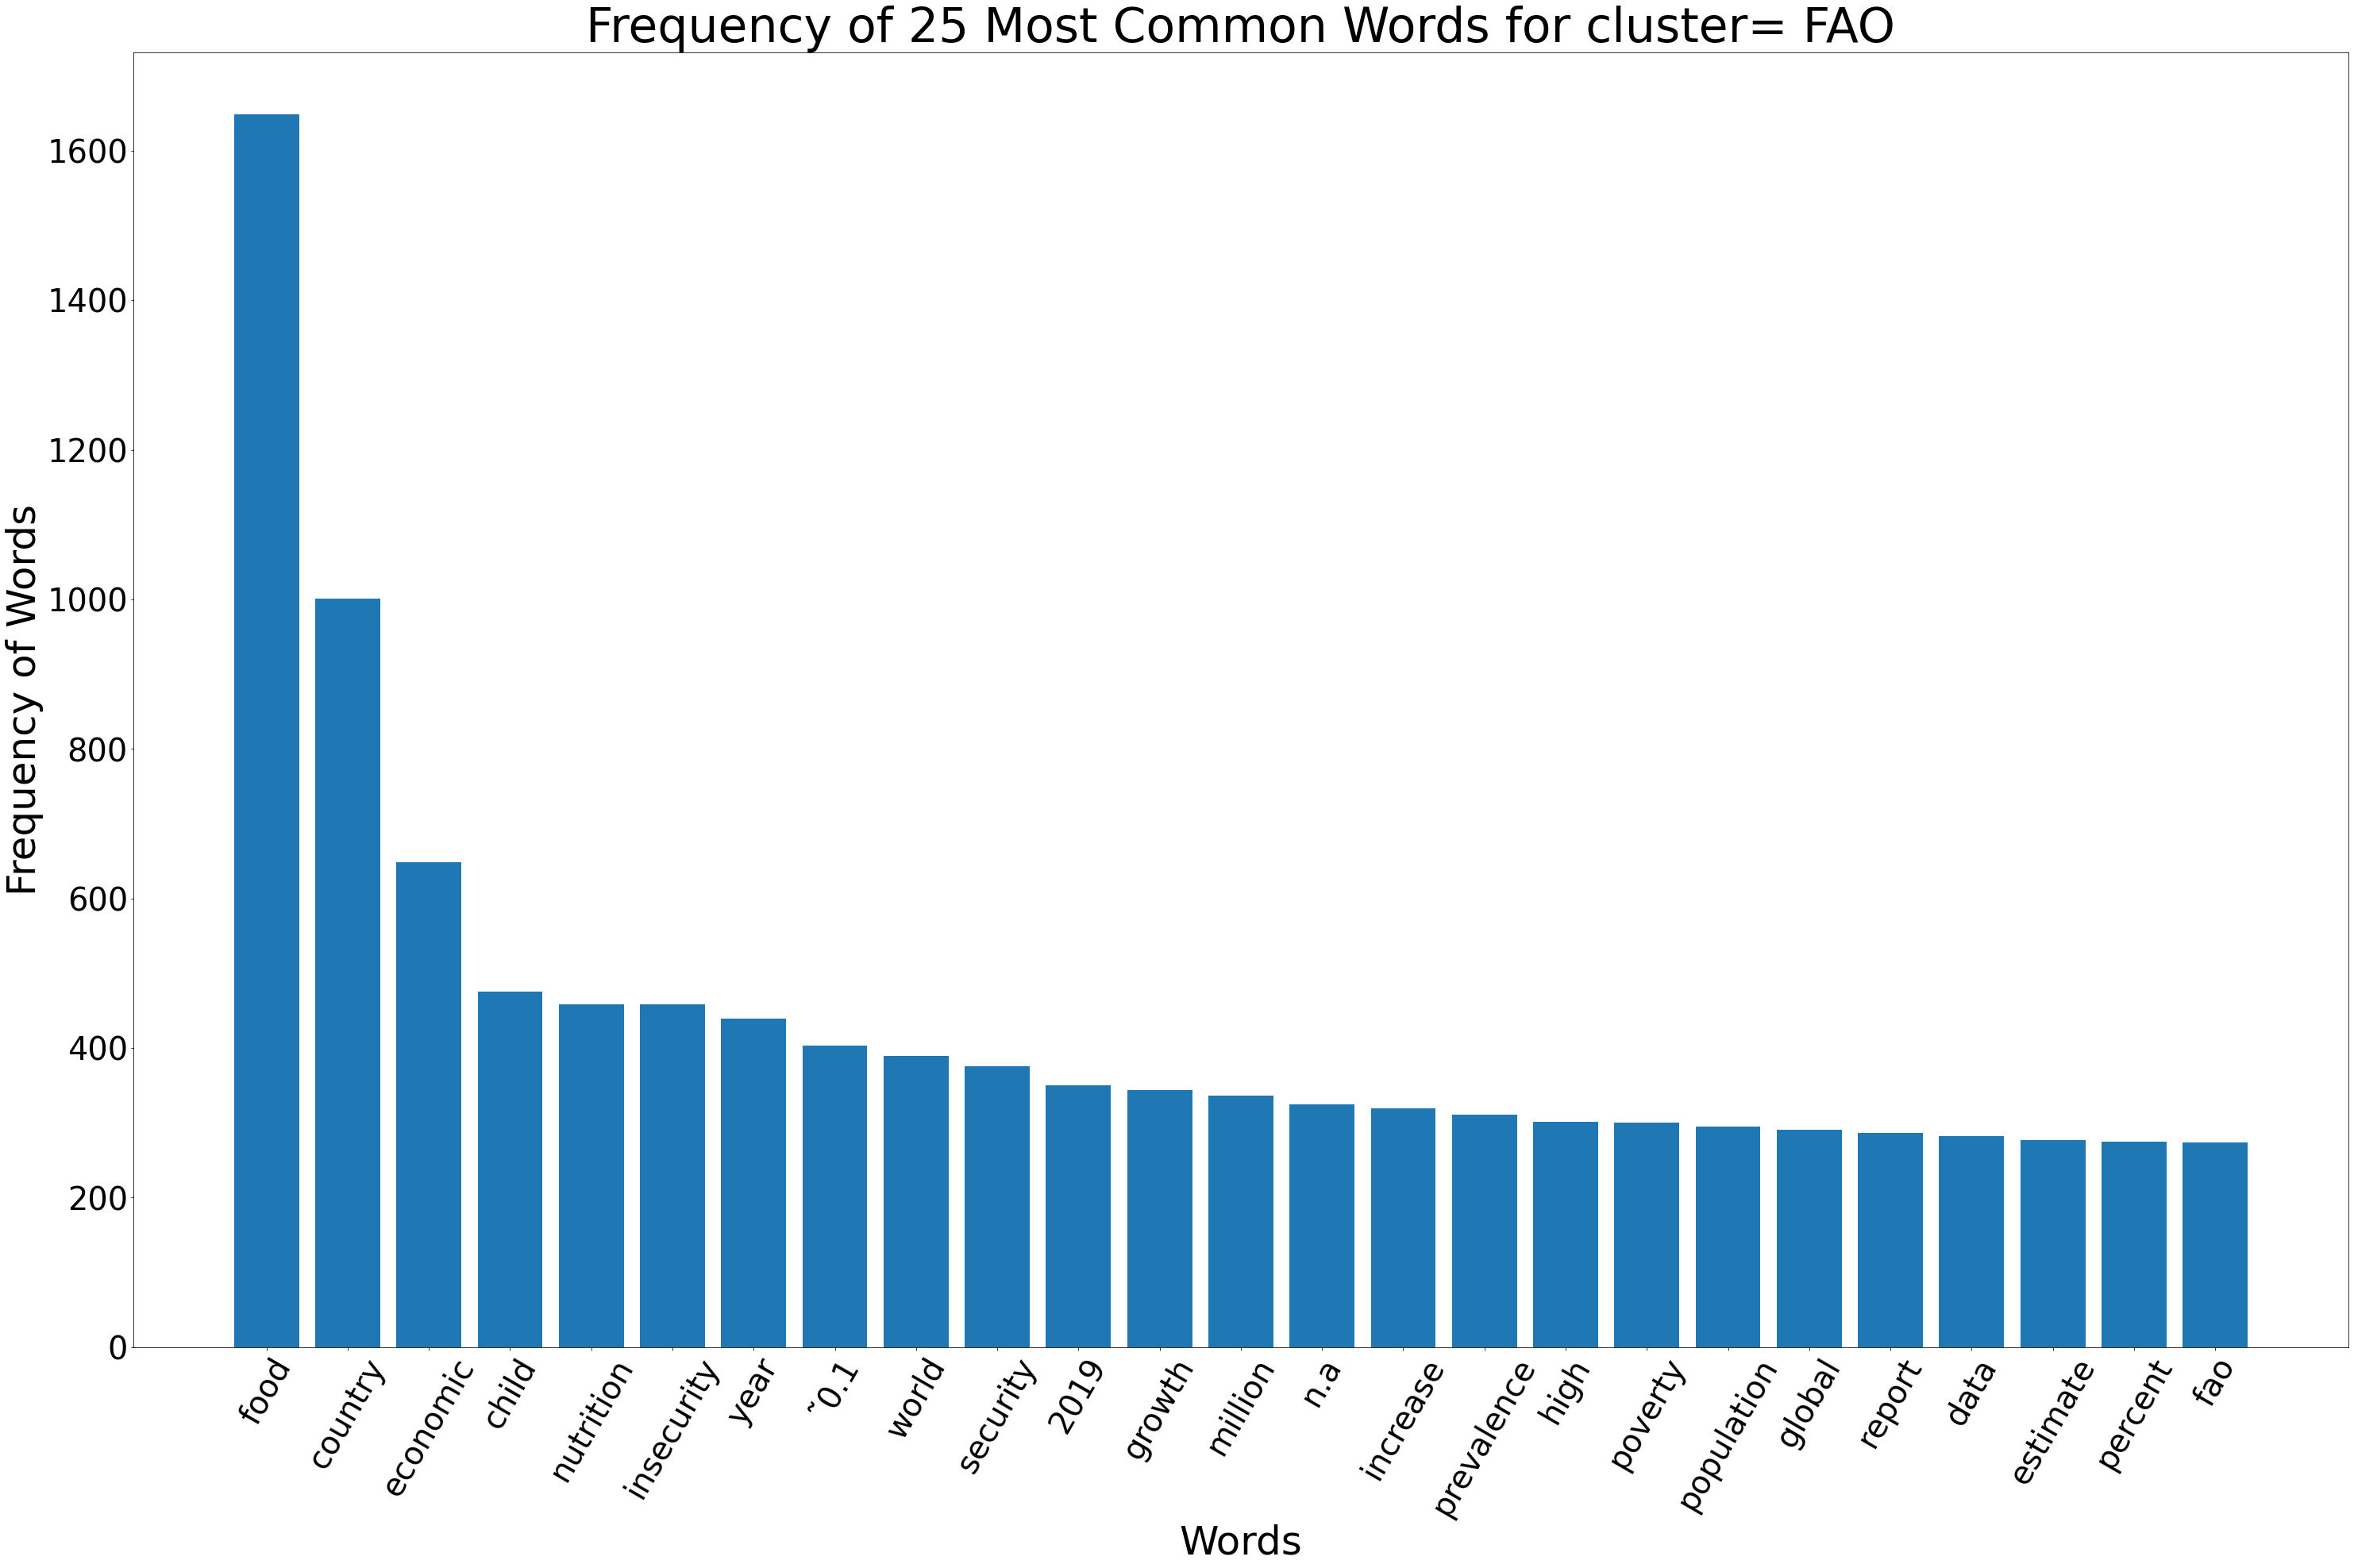

In [20]:
group_by = df.groupby('cluster')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for cluster= FAO', fontsize=60)
plt.show()

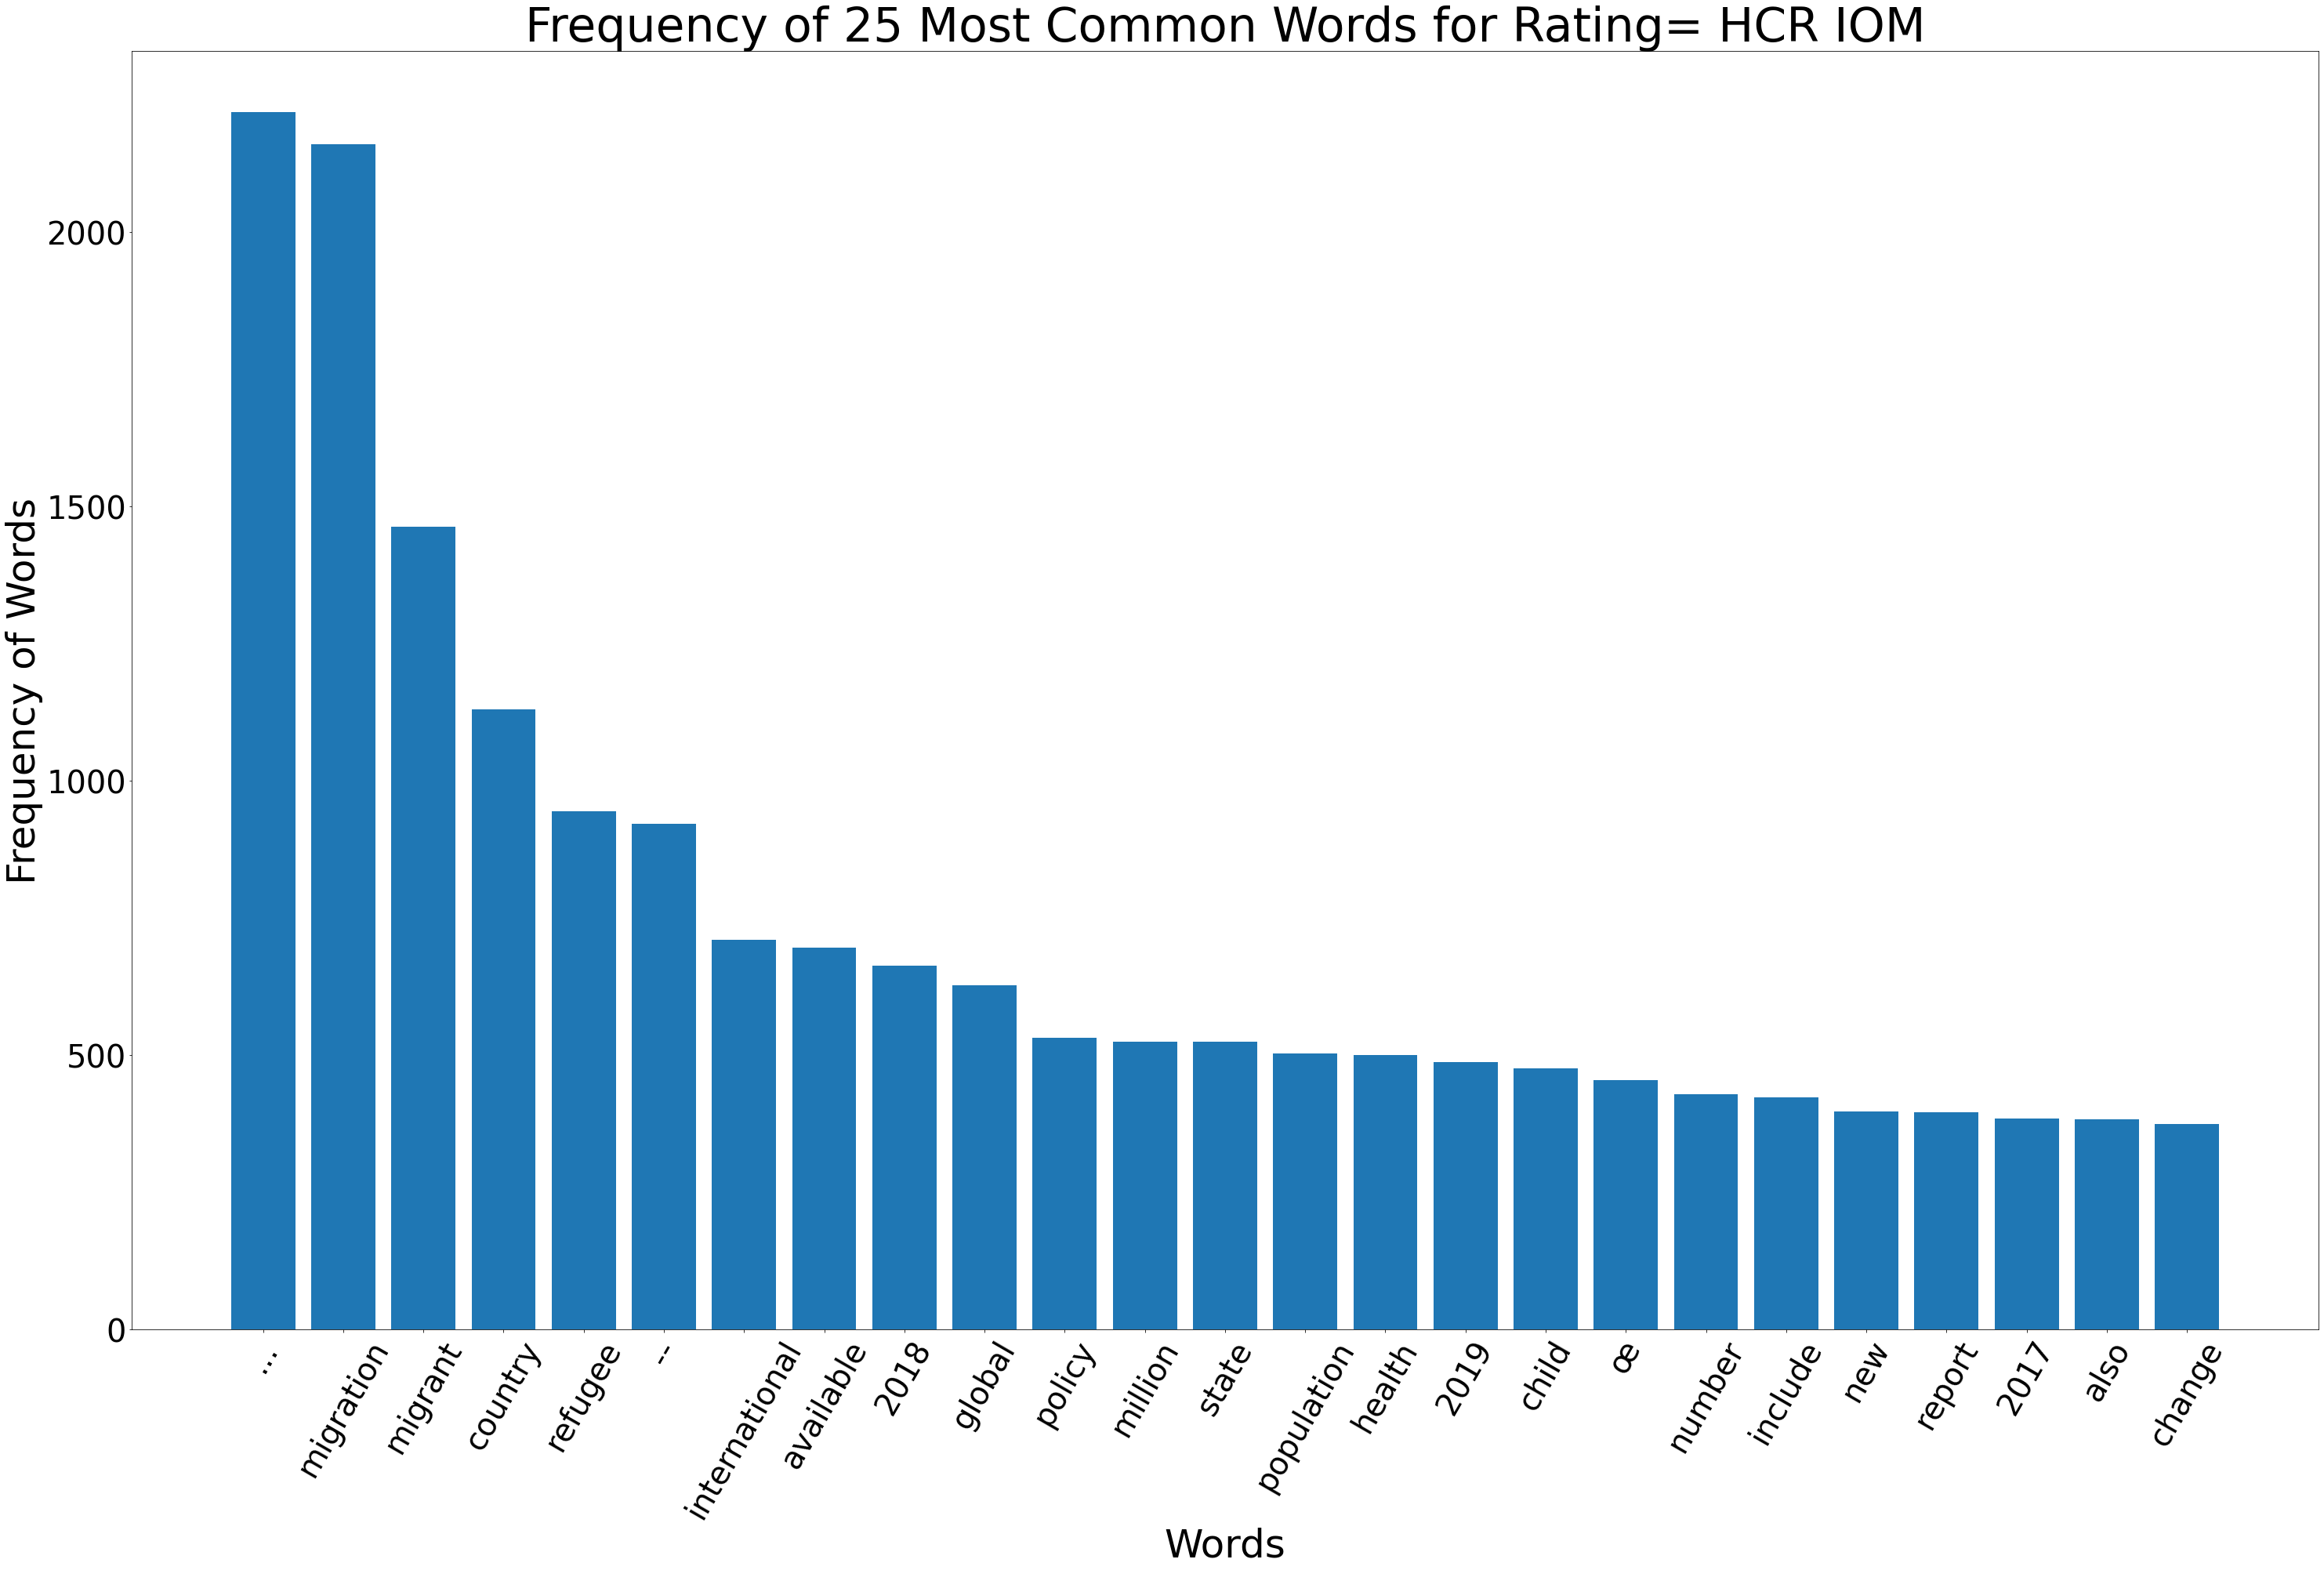

In [21]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating= HCR IOM', fontsize=60)
plt.show()

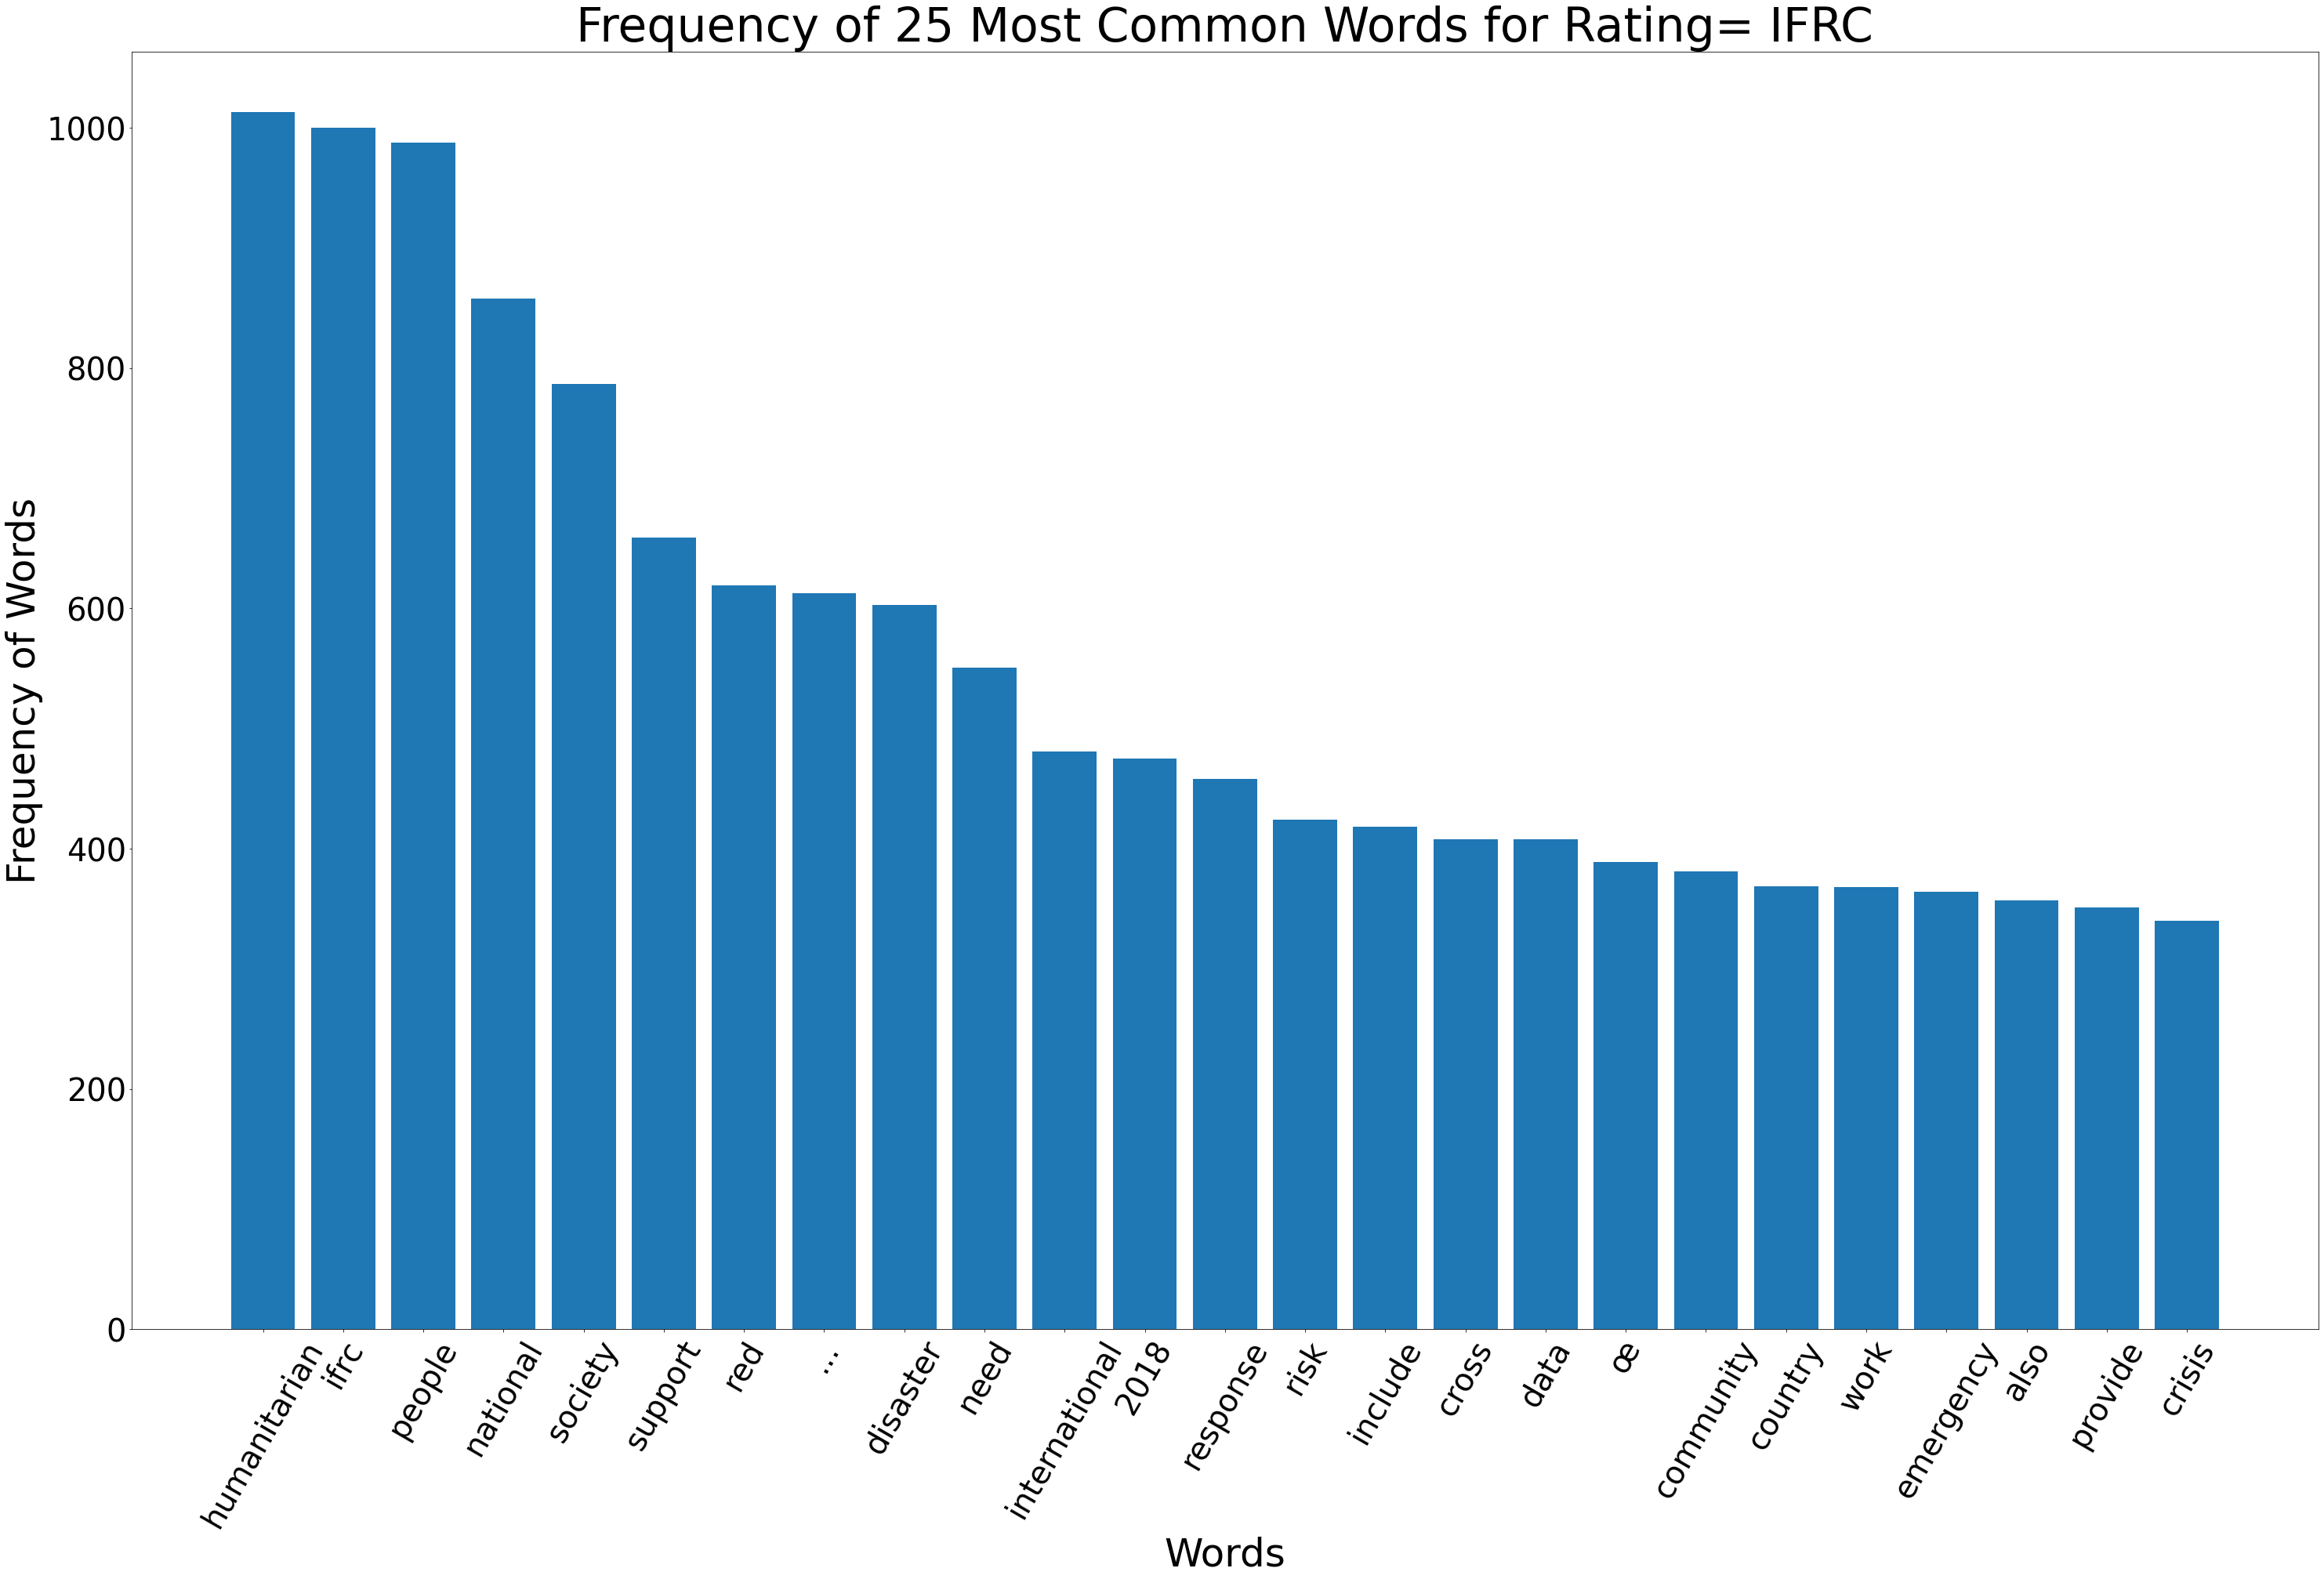

In [22]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating= IFRC', fontsize=60)
plt.show()

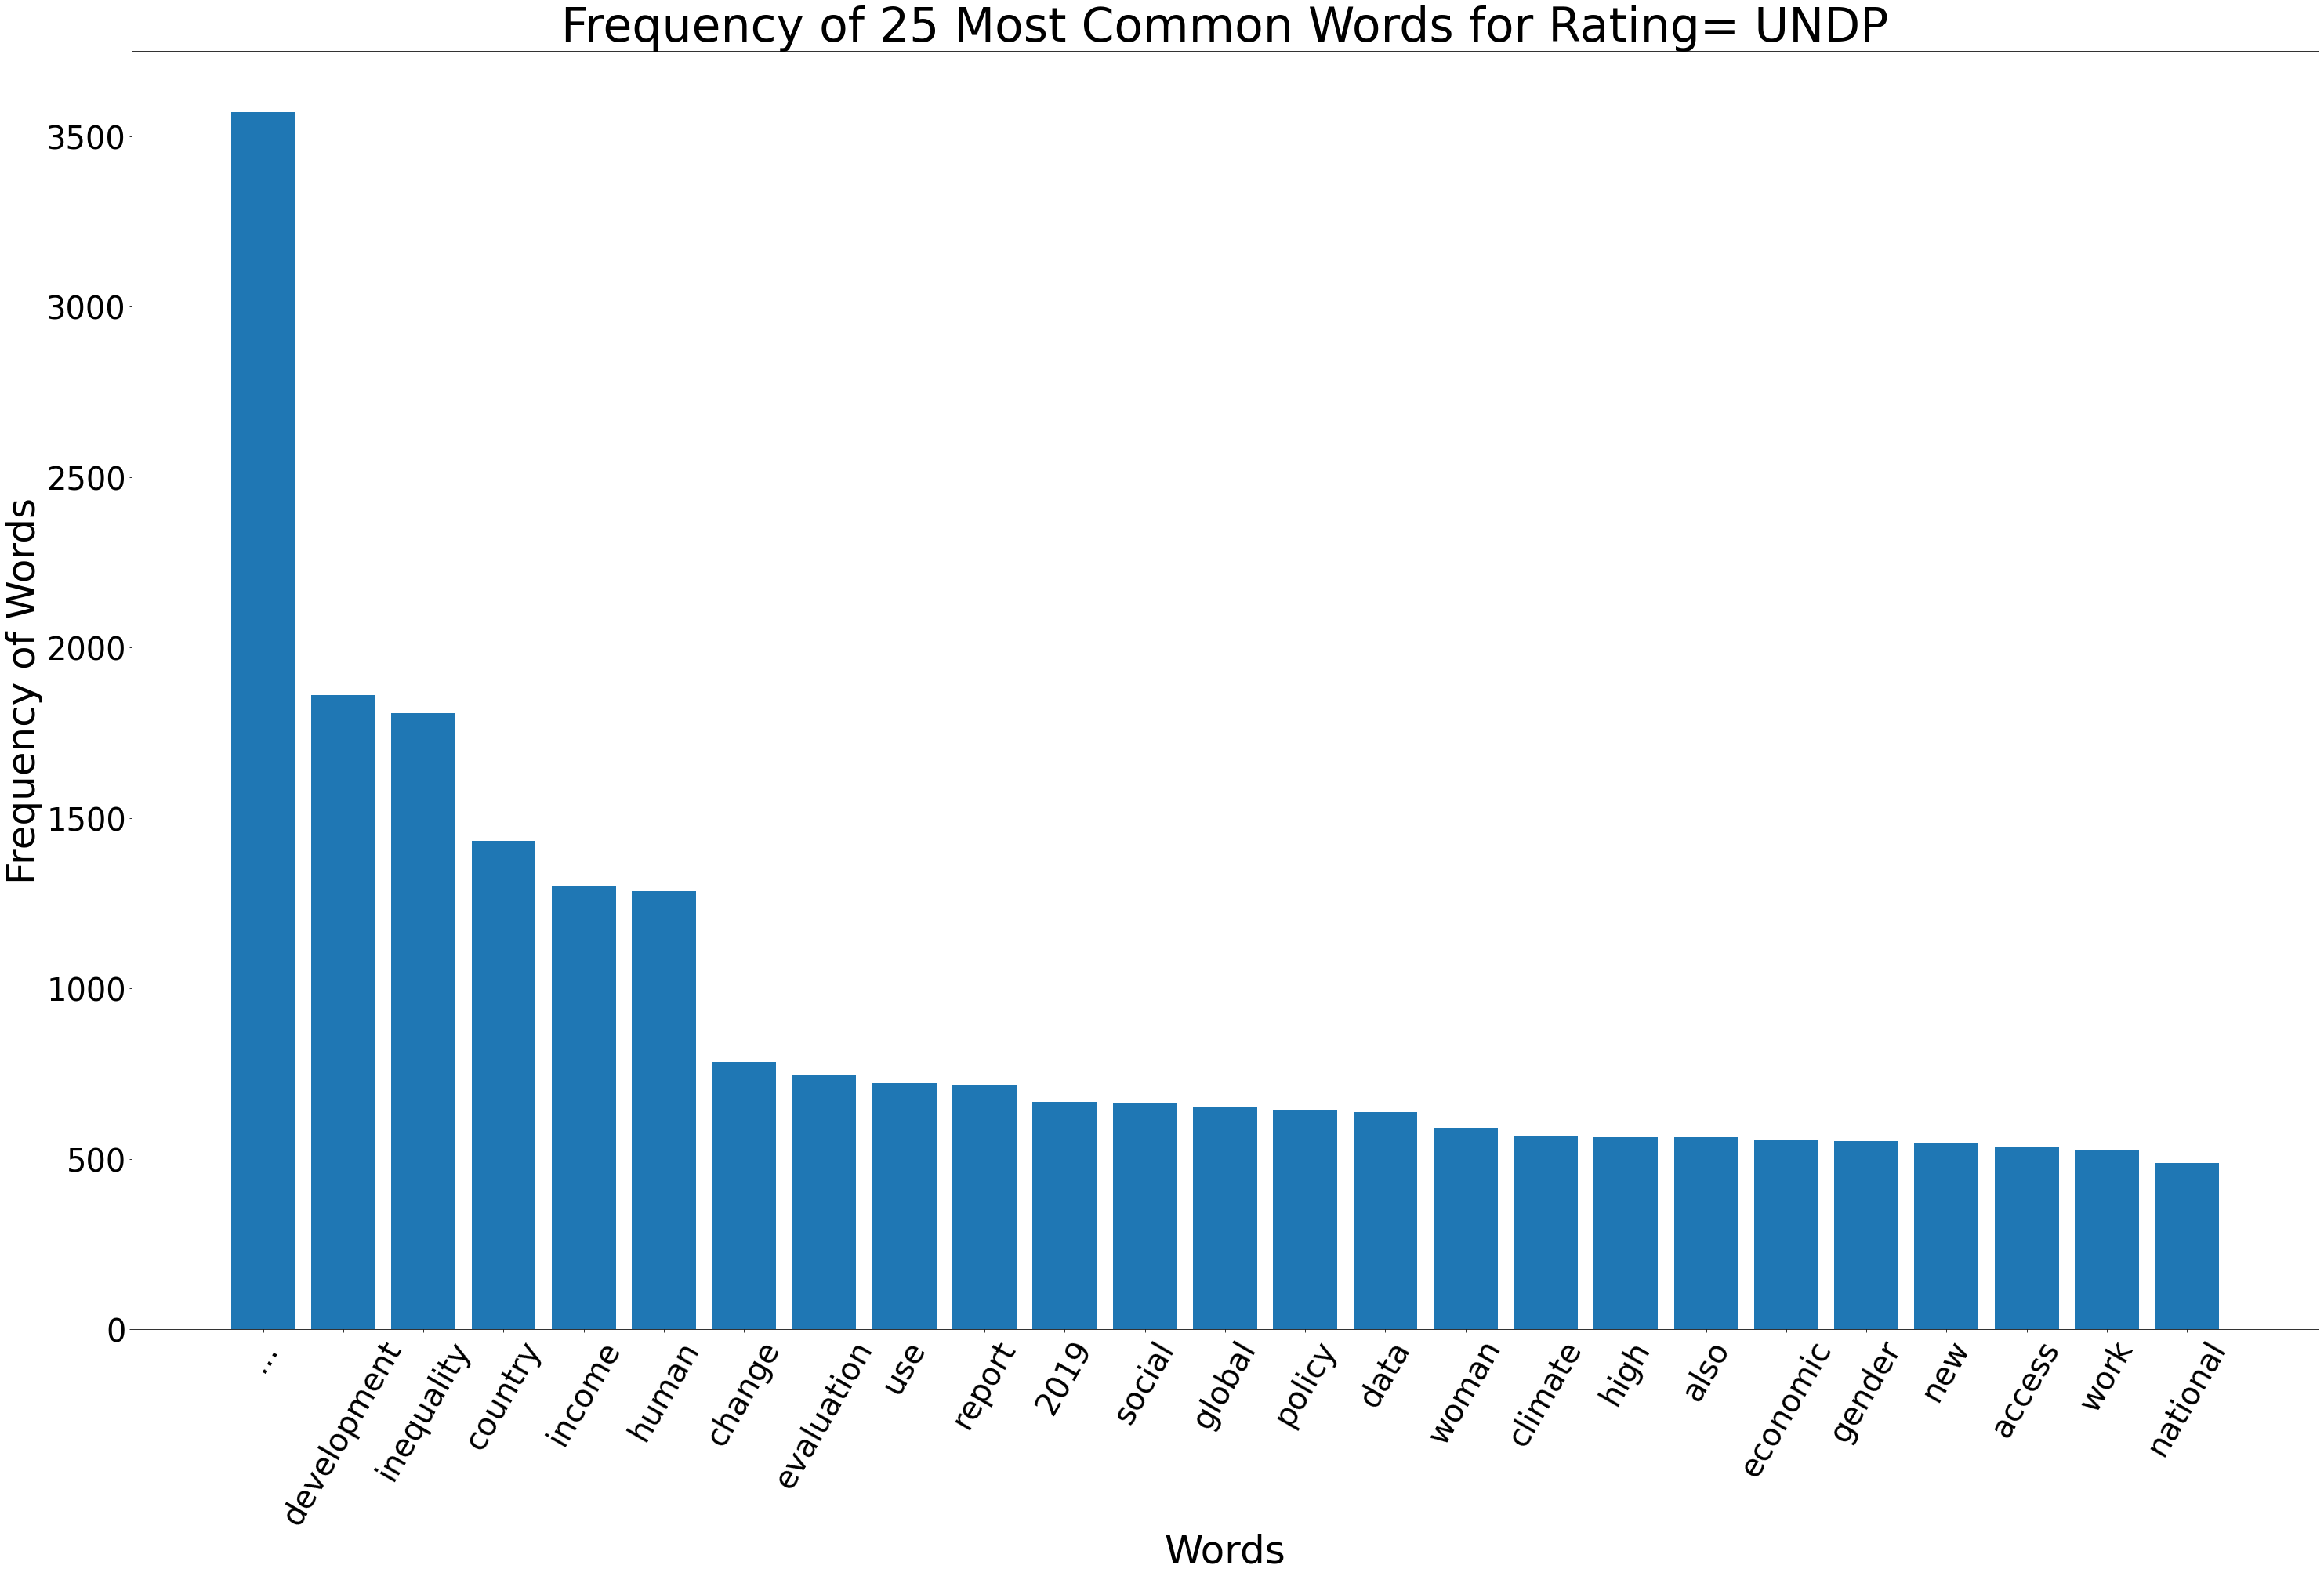

In [23]:
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words3, freq3)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating= UNDP', fontsize=60)
plt.show()

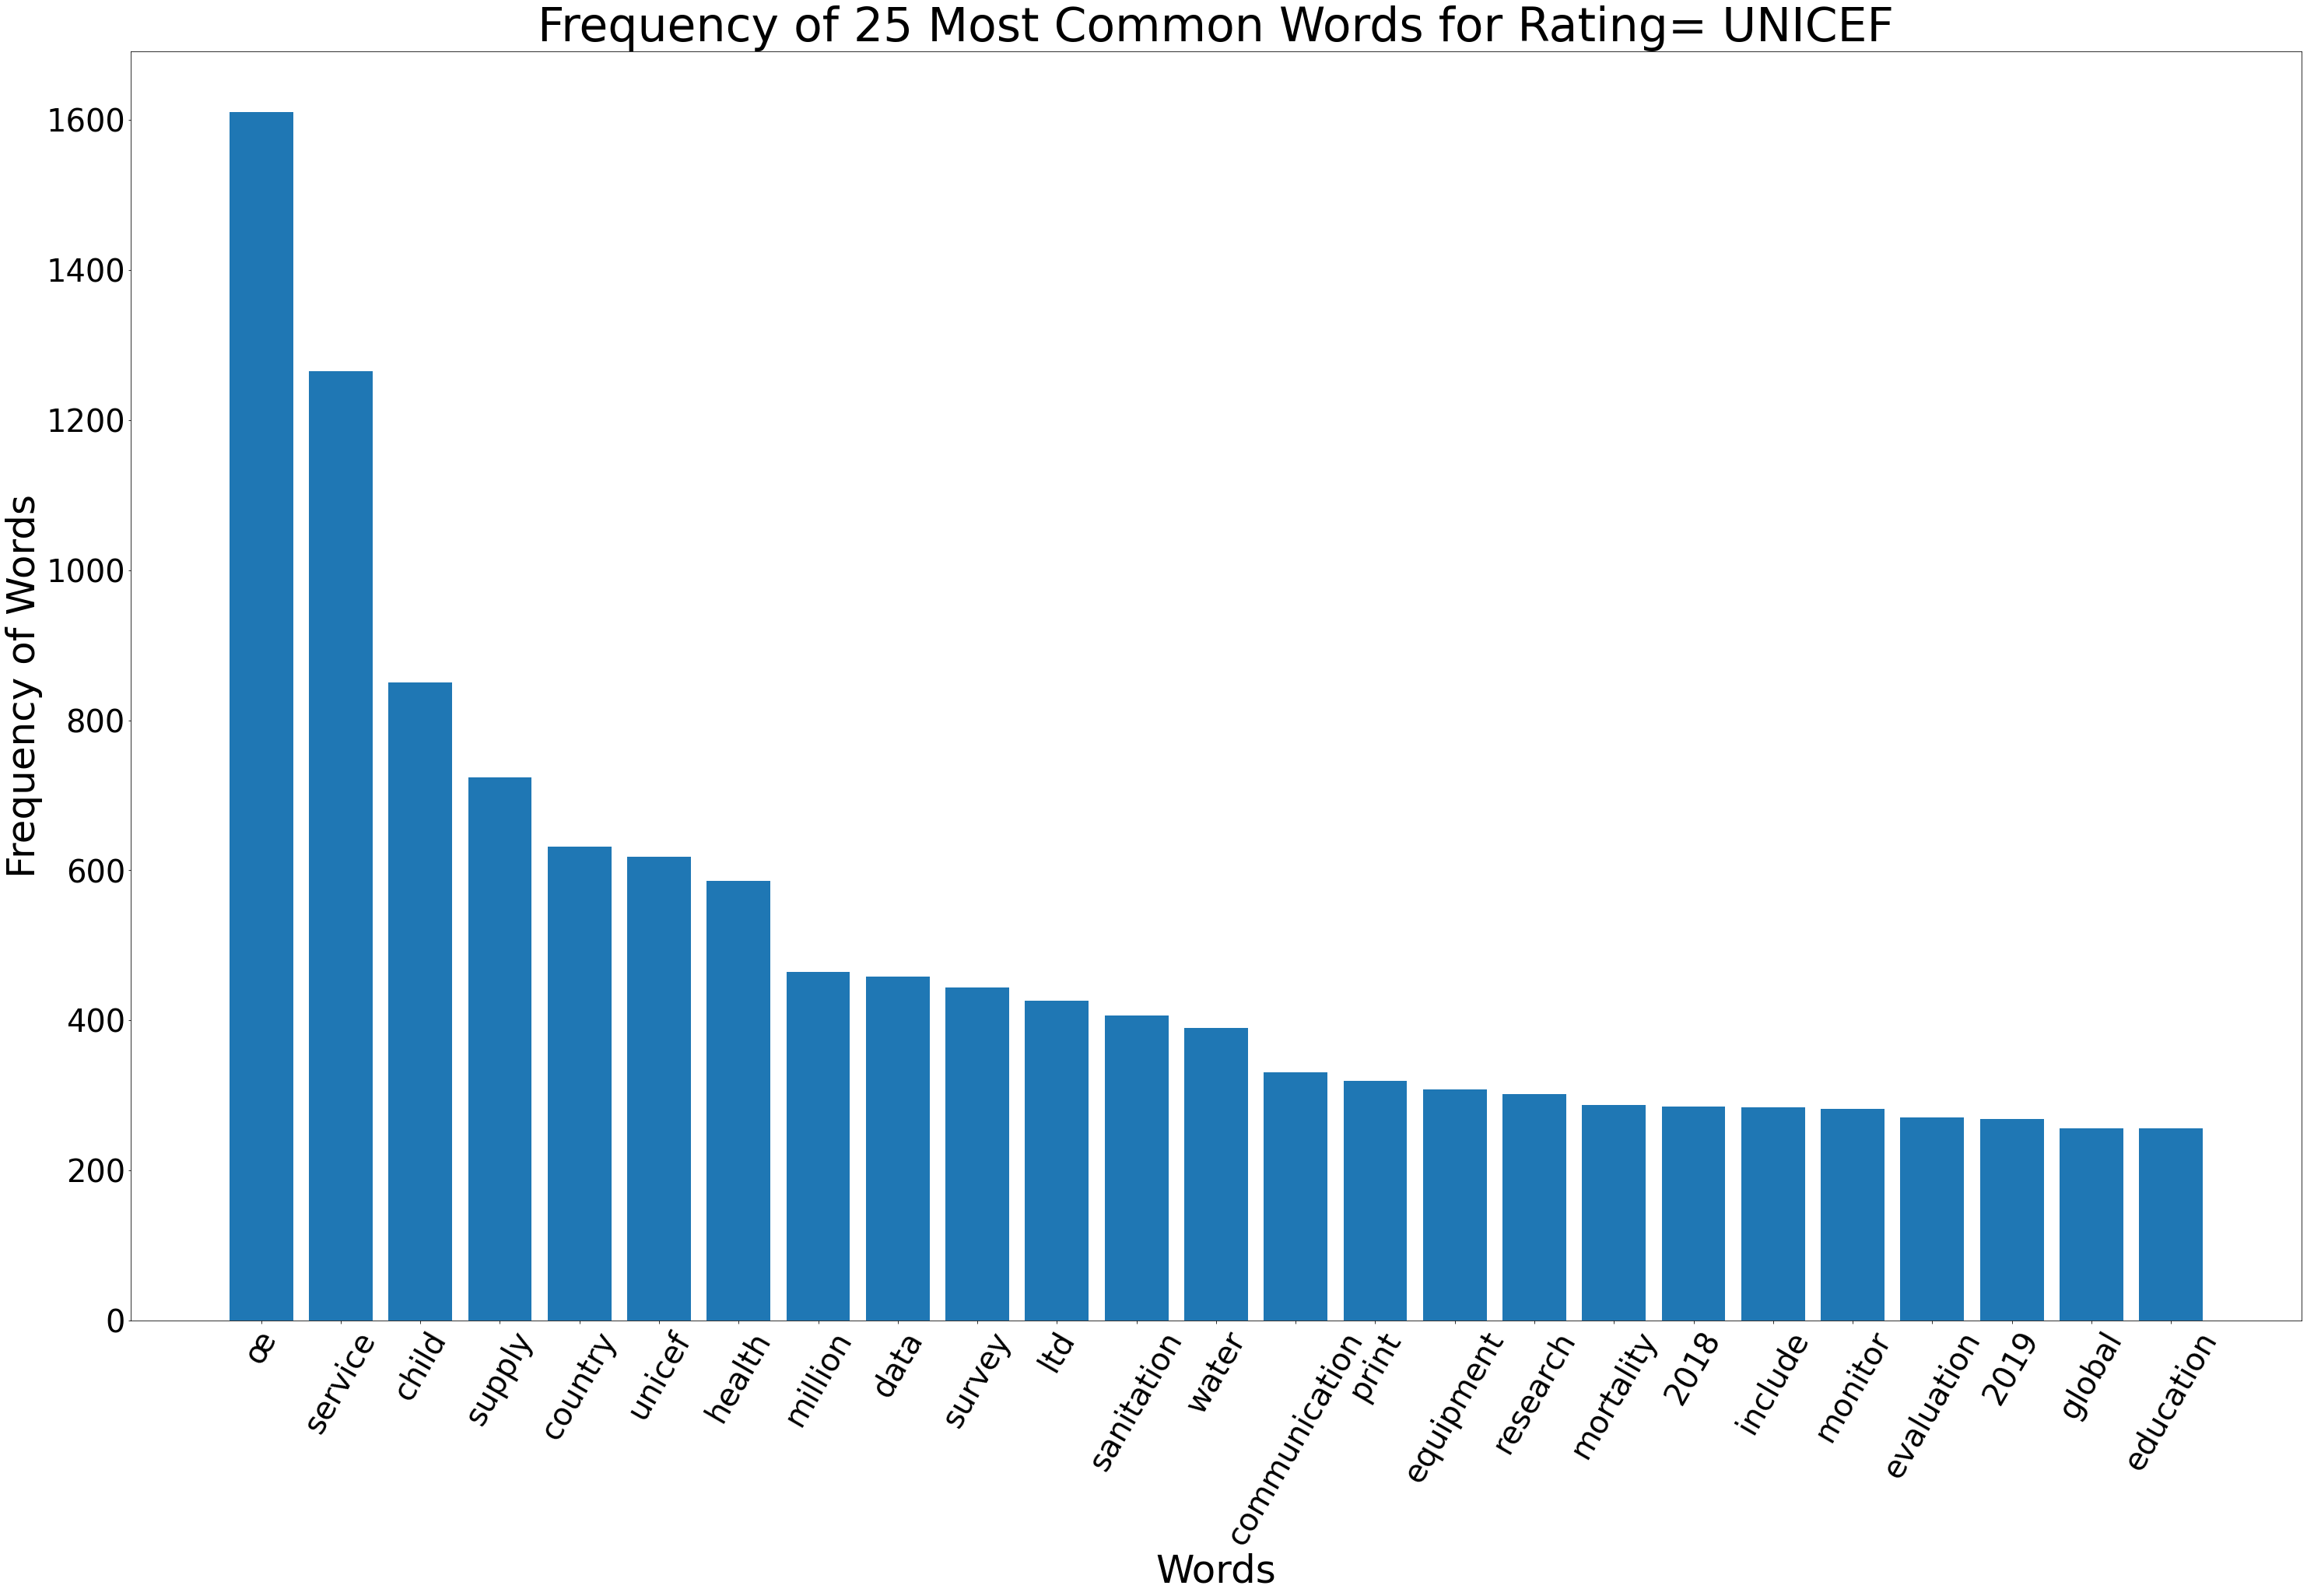

In [24]:
group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words4, freq4)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating= UNICEF', fontsize=60)
plt.show()

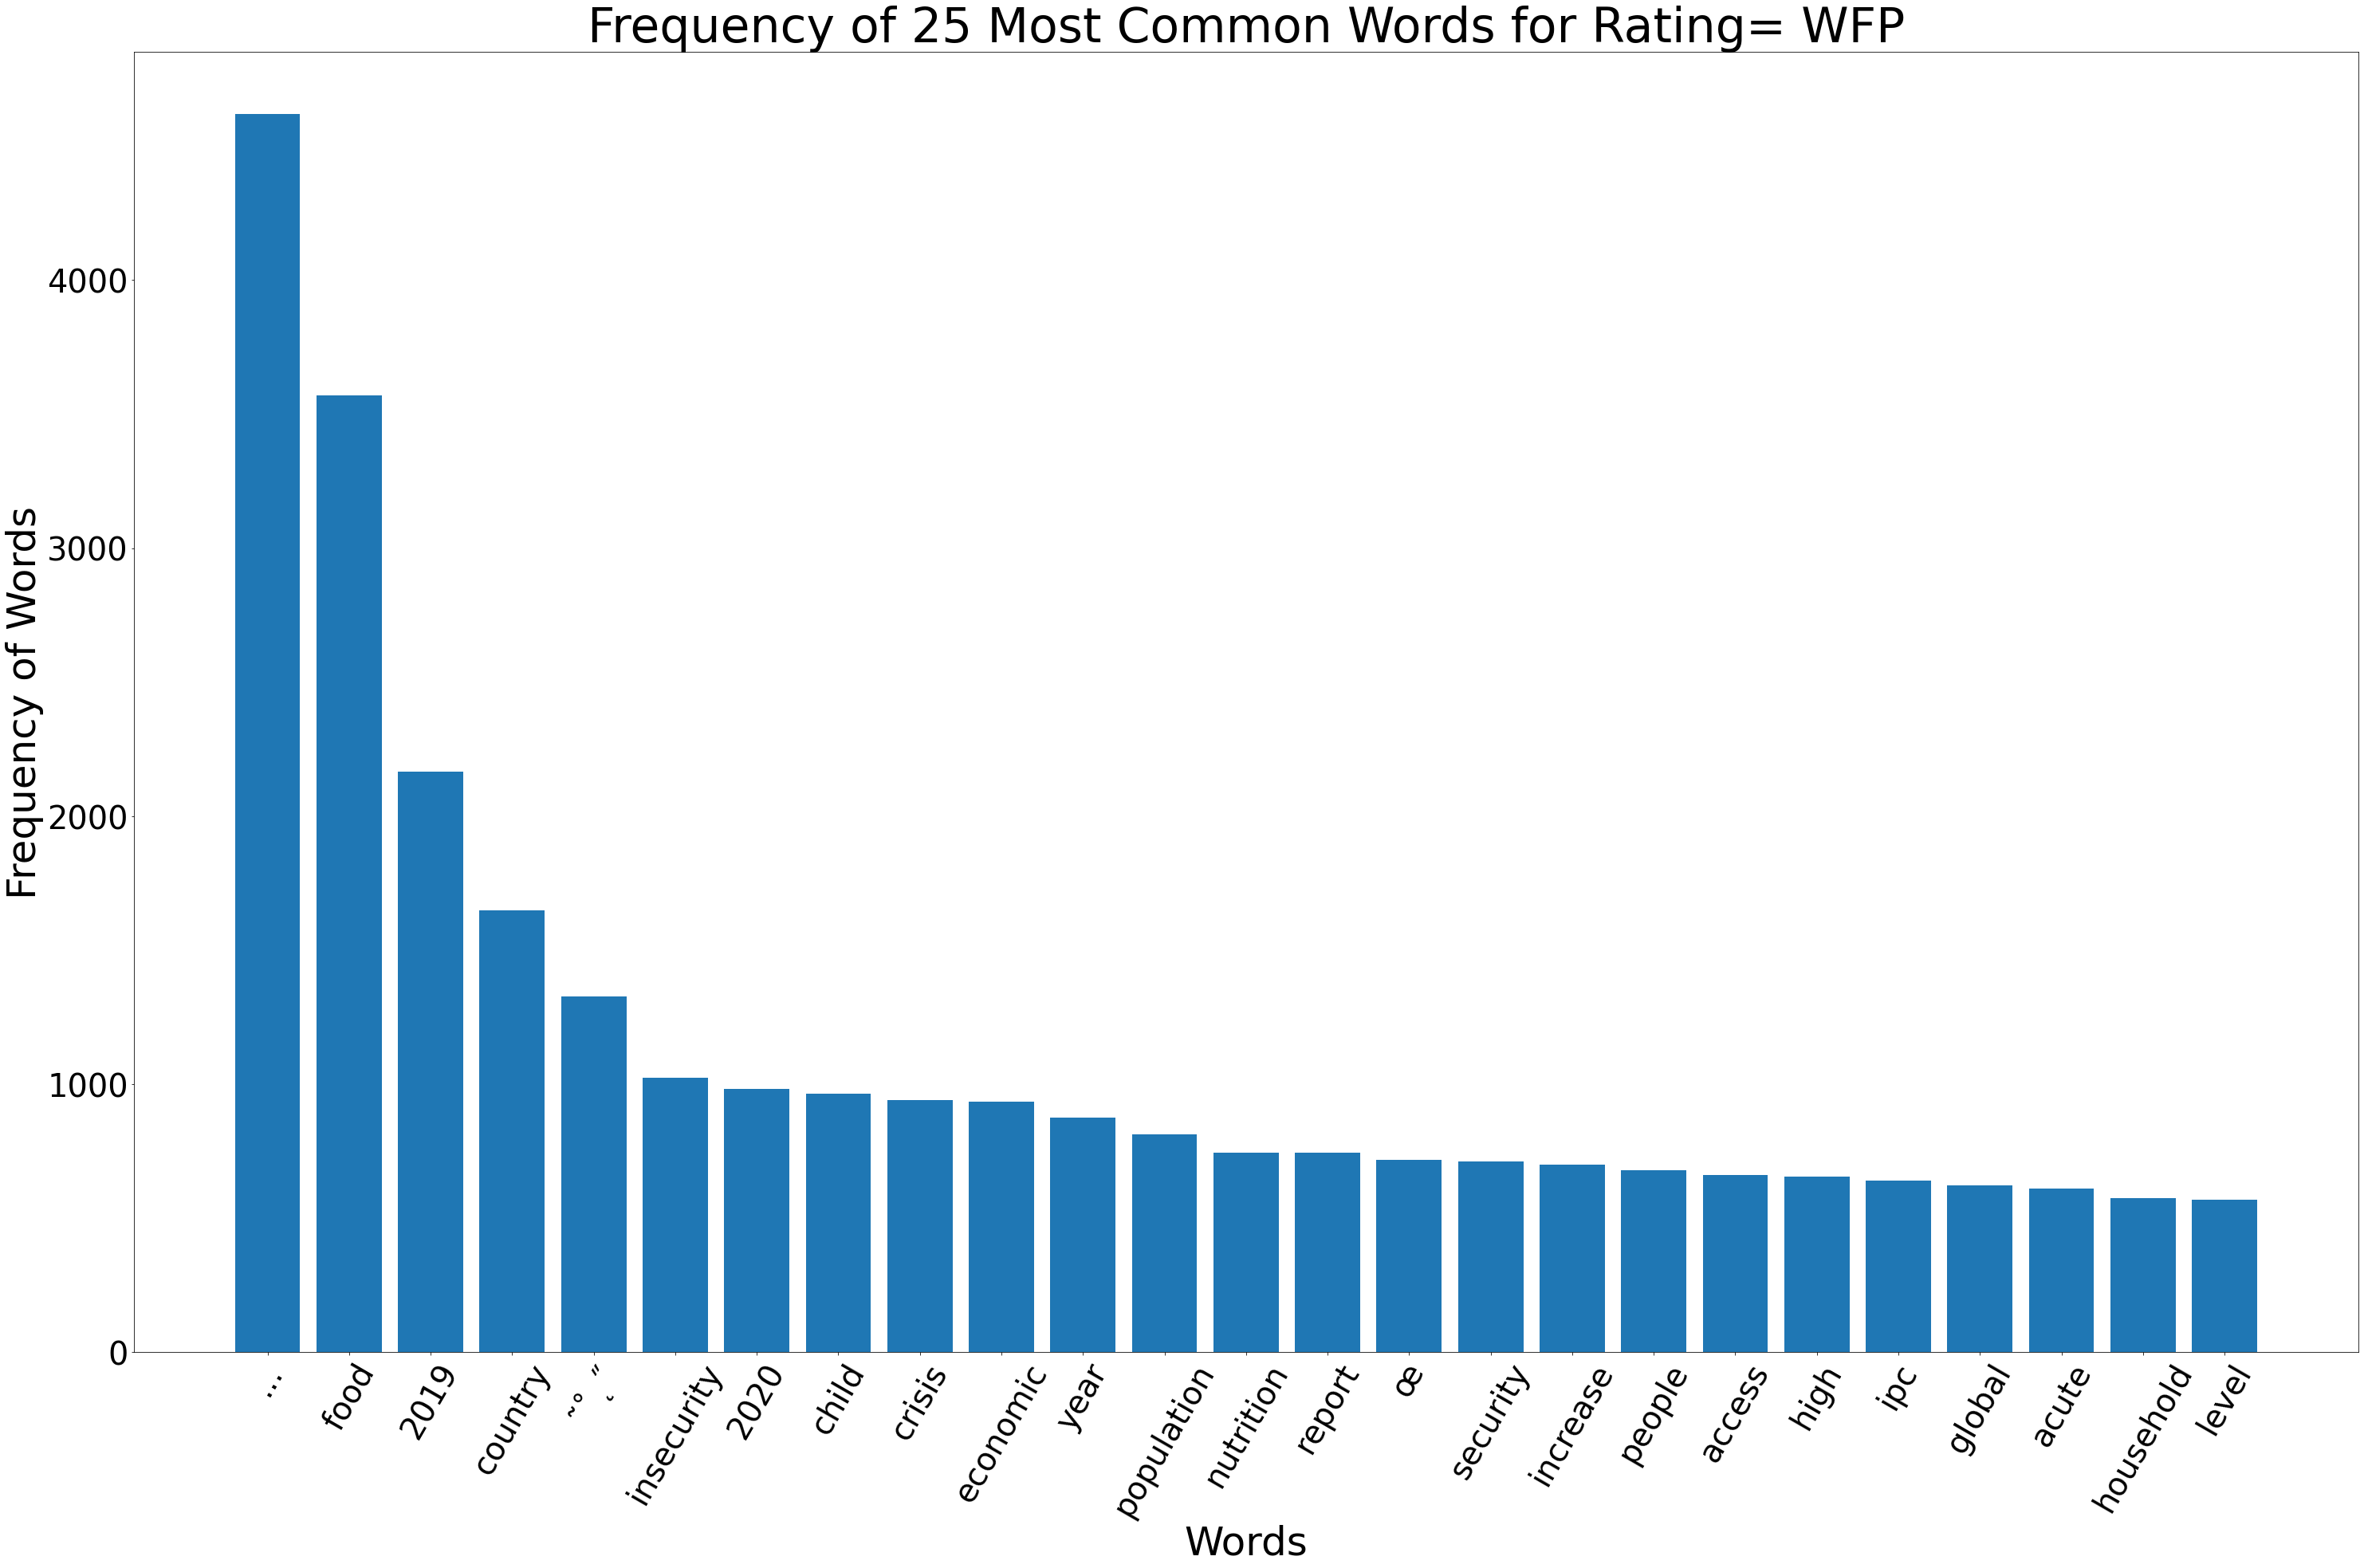

In [25]:
group_by_5 = group_by.iloc[5]
words5 = list(zip(*group_by_5))[0]
freq5 = list(zip(*group_by_5))[1]
plt.figure(figsize=(50,30))
plt.bar(words5, freq5)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating= WFP', fontsize=60)
plt.show()

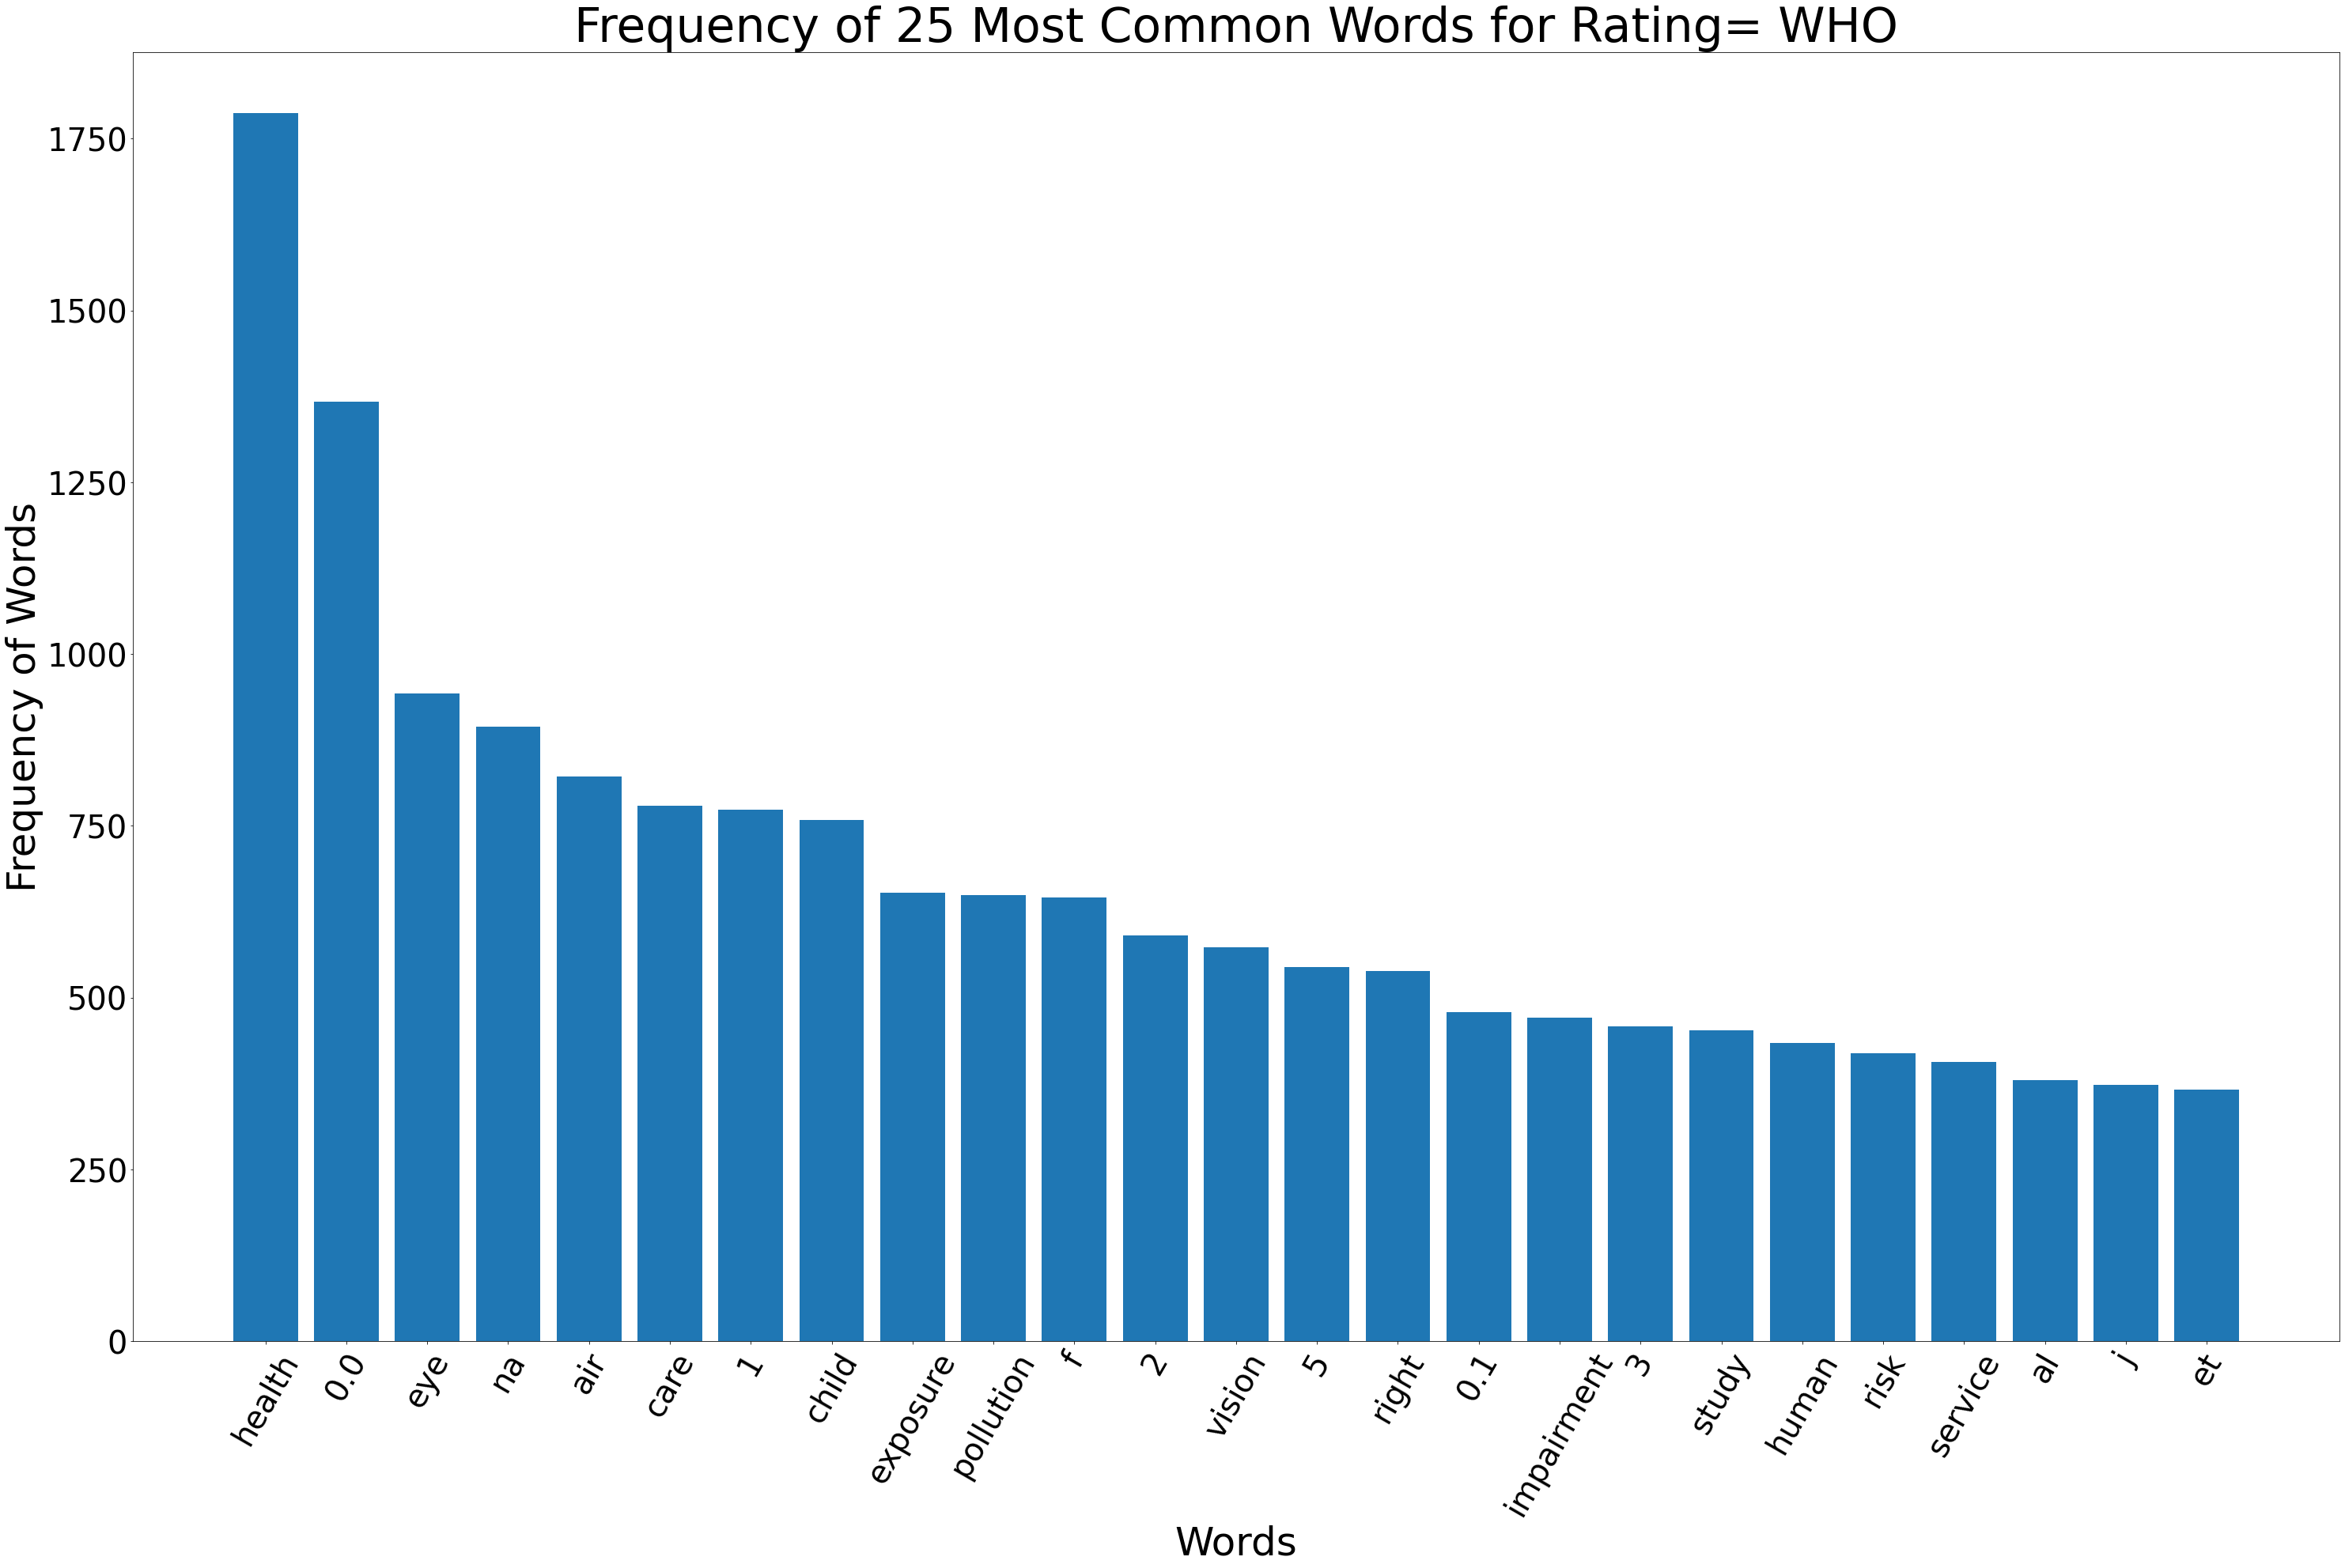

In [26]:
group_by_6 = group_by.iloc[6]
words6 = list(zip(*group_by_6))[0]
freq6 = list(zip(*group_by_6))[1]
plt.figure(figsize=(50,30))
plt.bar(words6, freq6)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating= WHO', fontsize=60)
plt.show()

In [27]:
group_by

cluster
FAO        [(food, 1649), (country, 1001), (economic, 649), (child, 475), (nutrition, 459), (insecurity, 45...
HCR IOM    [(..., 2219), (migration, 2160), (migrant, 1463), (country, 1130), (refugee, 944), (--, 921), (i...
IFRC       [(humanitarian, 1013), (ifrc, 1000), (people, 988), (national, 858), (society, 787), (support, 6...
UNDP       [(..., 3571), (development, 1860), (inequality, 1807), (country, 1433), (income, 1299), (human, ...
UNICEF     [(œ, 1611), (service, 1265), (child, 850), (supply, 724), (country, 632), (unicef, 618), (health...
WFP        [(..., 4620), (food, 3570), (2019, 2165), (country, 1648), (˜˚˛˝, 1328), (insecurity, 1025), (20...
WHO        [(health, 1787), (0.0, 1367), (eye, 943), (na, 894), (air, 822), (care, 779), (1, 774), (child, ...
Name: lemma_str, dtype: object

## Topic Modeling

### CountVectorizer

https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [28]:
tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=5000) # read this 
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,00,000,00010,00011,00012,0003,0004,0005,0006,0007,...,ˇooding,ˇoods,ﬁa,ﬁgender,ﬁglobal,ﬁhow,ﬁincome,ﬁinequality,ﬁthe,ﬁwhat
0,30,31,0,0,0,1,1,1,1,0,...,0,0,0,1,0,1,0,0,1,0
1,3,279,1,0,0,0,1,2,1,1,...,0,0,7,0,5,1,0,0,9,1
2,0,91,0,0,0,0,0,0,0,0,...,0,0,3,0,0,1,0,0,6,1
3,180,143,1,0,0,1,1,0,0,0,...,0,0,24,20,19,19,22,29,153,19
4,52,413,19,20,19,18,18,24,18,21,...,0,0,0,0,0,0,0,0,2,0
5,30,74,1,0,0,1,1,1,1,0,...,50,100,0,2,0,1,0,0,2,0
6,0,57,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,7,0


### Latent Dirichlet Allocation (LDA) Topic Modeling

In [29]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
country people service development include 2019 humanitarian food report data
Topic 1:
health country child food development service 2019 global world air
Topic 2:
food country 2019 people health global report economic child development
Topic 3:
health country child migration 2018 food year people global population
Topic 4:
food country 2019 insecurity economic year child nutrition population crisis
Topic 5:
country food 2019 migration health people child increase population economic
Topic 6:
people humanitarian ifrc national society support disaster international need red
Topic 7:
health child service eye care na air exposure pollution vision
Topic 8:
country development migration 2019 inequality human income 2018 global data
Topic 9:
country child food service development health people 2019 global level


In [30]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

C:\Users\mwamb\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
8     -247.636505   93.689430       1        1  40.030381
4      161.958450 -124.806870       2        1  31.232989
7       20.380348  -49.231201       3        1  15.727378
6      168.448059   48.439240       4        1  13.008671
1     -254.101044  -79.550003       5        1   0.000097
3     -118.586037 -157.553314       6        1   0.000097
9     -107.357933  195.564026       7        1   0.000097
2       21.675201 -226.657104       8        1   0.000097
0       32.969307  126.546585       9        1   0.000097
5     -106.017204   18.191151      10        1   0.000097, topic_info=     Category        Freq           Term        Total  loglift  logprob
2409  Default  6027.00000           food  6027.000000  30.0000  30.0000
2607  Default  4536.00000         health  4536.000000  29.0000  29.0000
3255  Default  2566.00000      migration  2566.000000  28.0000  28.0000
2822  Default  1779.00000     insecurity  1779.000000  27.0000  27.0000
255   Default  4743.00000           2019  4743.000000  26.0000  26.0000
...       ...         ...            ...          ...      ...      ...
3640  Topic10     0.00014        percent  1975.635190  -2.6149  -8.5172
2864  Topic10     0.00014  international  2168.591375  -2.7081  -8.5172
1000  Topic10     0.00014         access  2245.342513  -2.7428  -8.5172
3109  Topic10     0.00014            low  1871.328432  -2.5606  -8.5172
251   Topic10     0.00014           2018  3075.292791  -3.0574  -8.5172

[719 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         1  0.679872    000
1         2  0.095275    000
1         3  0.117474    000
1         4  0.108225    000
10        1  0.900735    001
...     ...       ...    ...
4988      4  0.935876     ˆˆ
4989      1  0.054753     ˆˇ
4989      3  0.082129     ˆˇ
4989      4  0.857792     ˆˇ
4991      2  0.998689  ˇoods

[852 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 8, 7, 2, 4, 10, 3, 1, 6])

### TF-IDF

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df =1, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,00,000,00010,00011,00012,0003,0004,0005,0006,0007,...,ˇooding,ˇoods,ﬁa,ﬁgender,ﬁglobal,ﬁhow,ﬁincome,ﬁinequality,ﬁthe,ﬁwhat
0,0.010509,0.008433,0.000000,0.000000,0.000000,0.000400,0.000350,0.000400,0.000350,0.000000,...,0.000000,0.000000,0.000000,0.000461,0.000000,0.000350,0.000000,0.000000,0.000272,0.000000
1,0.000776,0.056058,0.000295,0.000000,0.000000,0.000000,0.000259,0.000591,0.000259,0.000398,...,0.000000,0.000000,0.002068,0.000000,0.001701,0.000259,0.000000,0.000000,0.001808,0.000340
2,0.000000,0.023036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001116,0.000000,0.000000,0.000326,0.000000,0.000000,0.001519,0.000429
3,0.035733,0.022045,0.000227,0.000000,0.000000,0.000227,0.000199,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005439,0.005220,0.004959,0.003772,0.008093,0.010669,0.023587,0.004959
4,0.018670,0.115157,0.007788,0.013307,0.012642,0.007378,0.006463,0.009837,0.006463,0.011599,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000558,0.000000
5,0.004928,0.009441,0.000188,0.000000,0.000000,0.000188,0.000164,0.000188,0.000164,0.000000,...,0.015222,0.030443,0.000000,0.000432,0.000000,0.000164,0.000000,0.000000,0.000255,0.000000
6,0.000000,0.012425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000281,0.000000,...,0.000000,0.000000,0.000320,0.000000,0.000369,0.000000,0.000000,0.000000,0.001526,0.000000


### Non-Negative Matrix Factorization (NMF)

In [32]:
nmf = NMF(n_components=10, random_state=0, alpha=.1).fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
service unicef child ltd supply country health million survey sanitation
Topic 1:
ifrc humanitarian people national society support red disaster need response
Topic 2:
country health development child 2018 data global people service world
Topic 3:
food 2019 ipc 2020 wfp crisis insecurity acute phase conˇict
Topic 4:
food country economic nutrition insecurity commodity pou year income child
Topic 5:
food 2019 ipc 2020 wfp crisis insecurity acute phase conˇict
Topic 6:
ifrc humanitarian people national society red support disaster need response
Topic 7:
health na eye air impairment care pollution exposure child vision
Topic 8:
inequality development income human country percent 2019 evaluation change climate
Topic 9:
migration migrant refugee country international available 2018 global unhcr state
